<a href="https://colab.research.google.com/github/DhanaSrivalli/Optimizing-Employee-Attrition-Prediction-with-Feature-Selection-and-Machine-Learning/blob/main/21087223_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PREPROCESS, VISUALIZATION AND WITHOUT FEATURE SELECTION OF E_ATTRITION

In [102]:
pip install matplotlib==3.8.0

In [103]:
pip install seaborn==0.13.2

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
import pandas as E_AttPan
import seaborn as E_AttSea
import matplotlib.pyplot as E_AttPypl

E_Attrition = E_AttPan.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')
E_Attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [106]:
E_Attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [107]:
print("Employee Attrition Shape: ",E_Attrition.shape)
E_Attrition['Attrition'].value_counts()

Employee Attrition Shape:  (1470, 35)


,count
Attrition,
No,1233
Yes,237


In [108]:
E_Attrition.select_dtypes(include=['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [109]:
E_Attrition['BusinessTravel'].nunique()

3

In [110]:
E_Attrition['EmployeeCount'].nunique()

1

In [111]:
E_Attrition['StandardHours'].nunique()

1

In [112]:
### Removing Non-Essential Features, Inspecting for Missing Entries, and Resolving Duplicates
E_Attrition= E_Attrition.drop(['EmployeeCount','StandardHours'], axis=1) ### Removing Two Columns from the DataFrame to Manage Duplicates
print("Missing Values in the E-Attrition: ",E_Attrition.isnull().values.sum())
print("Duplicates in the E-Attrition    : ",E_Attrition.duplicated().sum())
print("Employee Attrition Shape: ",E_Attrition.shape)

Missing Values in the E-Attrition:  0
Duplicates in the E-Attrition    :  0
Employee Attrition Shape:  (1470, 33)


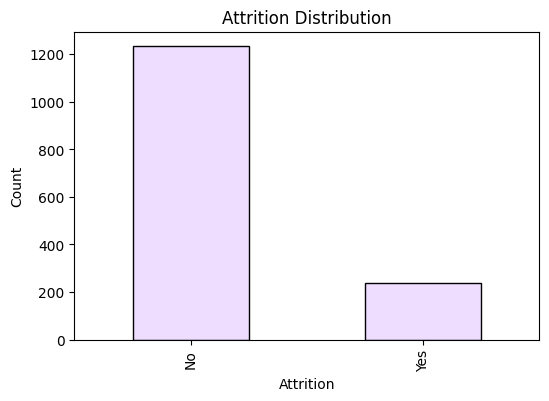

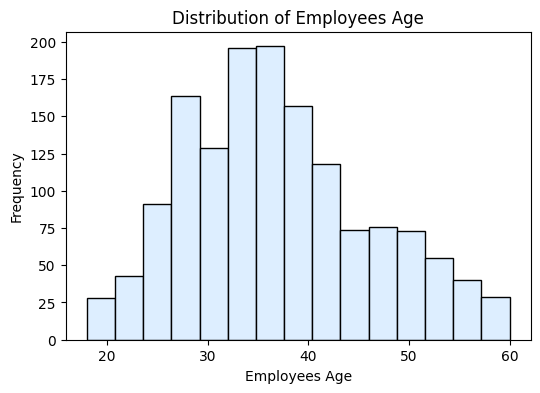

In [113]:
E_AttPypl.figure(figsize=(6, 4))
E_Attrition['Attrition'].value_counts().plot(kind='bar', color='#eeddff', edgecolor='black')
E_AttPypl.title('Attrition Distribution')
E_AttPypl.xlabel('Attrition')
E_AttPypl.ylabel('Count')
E_AttPypl.show()

print("\n\n")
E_AttPypl.figure(figsize=(6, 4))
E_AttPypl.hist(E_Attrition['Age'], bins=15, color='#ddeeff', edgecolor='black')
E_AttPypl.title('Distribution of Employees Age')
E_AttPypl.xlabel('Employees Age')
E_AttPypl.ylabel('Frequency')
E_AttPypl.show()

**1233 Employees have No Attrition but 237 Employees have Attrition.**

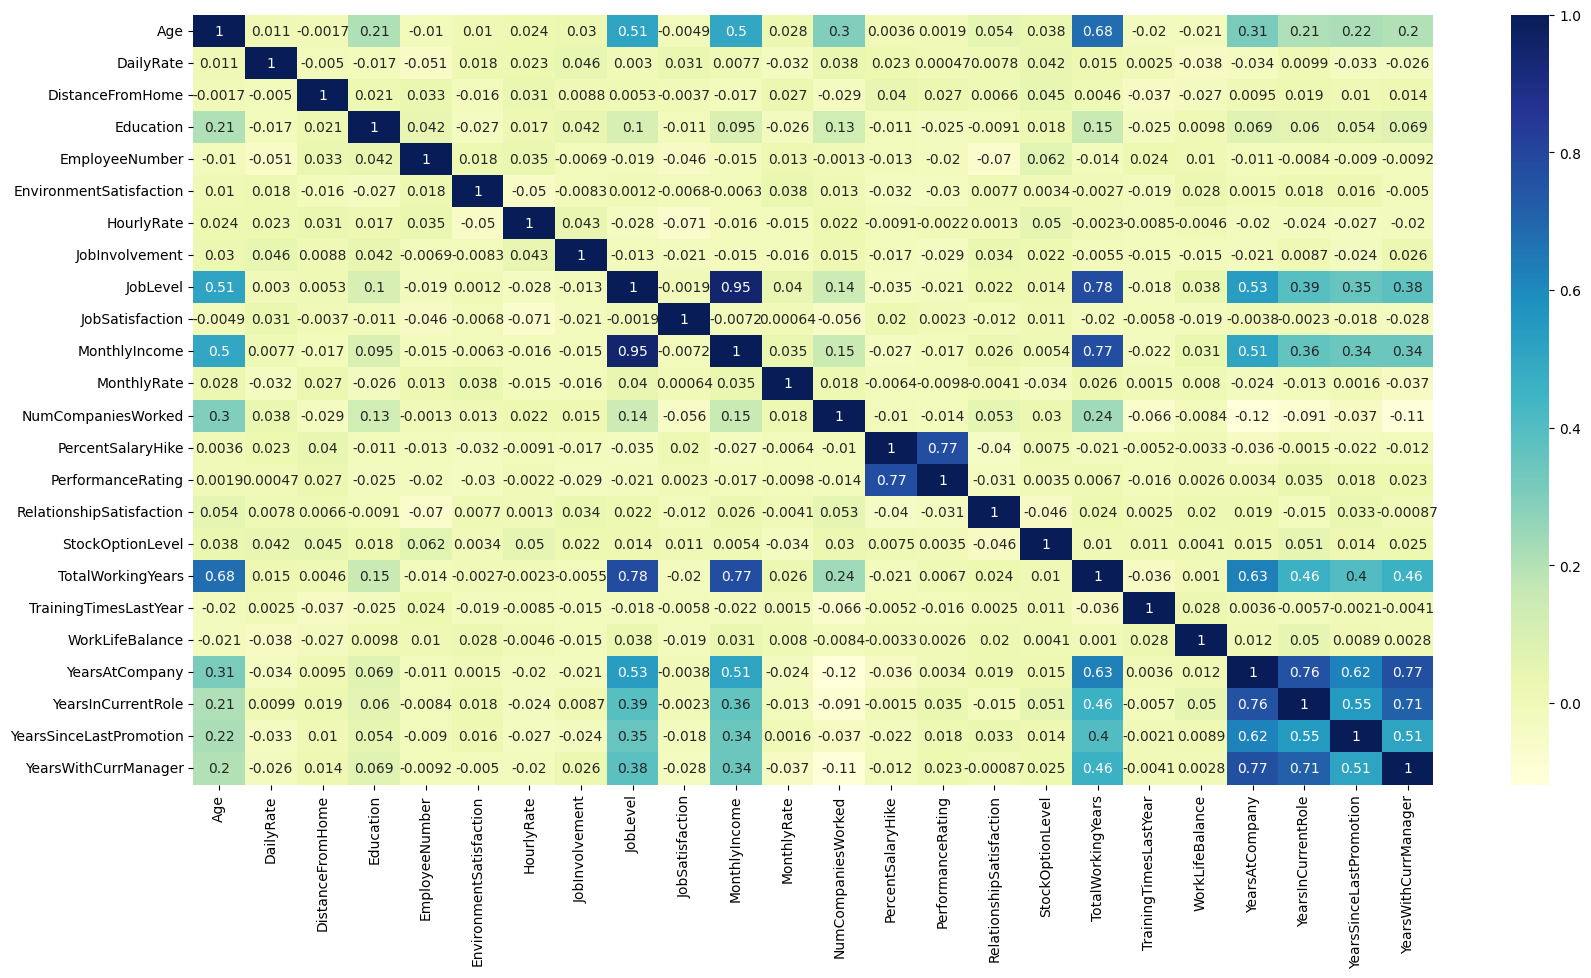

In [114]:
### Visualizing Feature Correlations Using a Heatmap
E_Attrition.corr(numeric_only=True)
E_AttPypl.figure(figsize=(20, 10))
dataplot = E_AttSea.heatmap(E_Attrition.corr(numeric_only=True), cmap="YlGnBu", annot=True)
E_AttPypl.show()

In [115]:
E_Attrition.select_dtypes(include=['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [116]:
from sklearn import preprocessing as E_AttPProcess
E_Ob_to_num = E_AttPProcess.LabelEncoder()
E_Attrition['Attrition']= E_Ob_to_num.fit_transform(E_Attrition['Attrition'])
E_Attrition['BusinessTravel']= E_Ob_to_num.fit_transform(E_Attrition['BusinessTravel'])
E_Attrition['Department']= E_Ob_to_num.fit_transform(E_Attrition['Department'])
E_Attrition['EducationField']= E_Ob_to_num.fit_transform(E_Attrition['EducationField'])
E_Attrition['Gender']= E_Ob_to_num.fit_transform(E_Attrition['Gender'])
E_Attrition['JobRole']= E_Ob_to_num.fit_transform(E_Attrition['JobRole'])
E_Attrition['MaritalStatus']= E_Ob_to_num.fit_transform(E_Attrition['MaritalStatus'])
E_Attrition['Over18']= E_Ob_to_num.fit_transform(E_Attrition['Over18'])
E_Attrition['OverTime']= E_Ob_to_num.fit_transform(E_Attrition['OverTime'])

### Applying the SMOTE Oversampling Technique to Balance the Employee Attrition Dataset.

In [117]:
from collections import Counter as E_AttCount
from imblearn.over_sampling import SMOTE as E_AttSTE
E_AttritionX = E_Attrition.drop('Attrition',axis=1)
E_AttritionY = E_Attrition['Attrition']

print('Attrition Categories  %s' % E_AttCount(E_AttritionY))
Att_EMod = E_AttSTE()
E_AttritionX, E_AttritionY = Att_EMod.fit_resample(E_AttritionX, E_AttritionY)
print('Balanced Attrition Categories %s' % E_AttCount(E_AttritionY))
E_Attrition = E_AttPan.concat([E_AttritionX, E_AttritionY], axis=1)

print("\nEmployee Attrition Shape: ",E_Attrition.shape)
E_Attrition['Attrition'].value_counts()

Attrition Categories  Counter({0: 1233, 1: 237})
Balanced Attrition Categories Counter({1: 1233, 0: 1233})

Employee Attrition Shape:  (2466, 33)


,count
Attrition,
1,1233
0,1233


In [118]:
E_Attrition.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [119]:
E_Attrition.to_csv('E_Attrition.csv', index=False)
E_Attrition

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,1,2,0,...,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,2,3,1,...,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,4,1,...,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,5,4,0,...,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,7,1,1,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,34,1,388,1,16,2,1,494,3,0,...,1,0,9,2,2,7,2,4,5,1
2462,26,1,1429,1,15,4,2,398,1,1,...,3,1,4,2,3,2,1,0,1,1
2463,33,2,716,1,18,2,3,1161,1,0,...,2,1,13,2,3,11,6,6,7,1
2464,43,1,1065,1,9,3,1,1191,3,1,...,2,0,5,3,3,5,3,0,2,1


In [120]:
from sklearn.model_selection import train_test_split as E_AttTSpl
E_AttritionX = E_Attrition.drop('Attrition',axis=1)
E_AttritionY = E_Attrition['Attrition']

### Splitting the Data into 70% for Training, 15% for Validation, and 15% for Testing

E_AttritionXtrn, E_AttritiontXtst, E_AttritionYtrn, E_AttritionYtst = E_AttTSpl(E_AttritionX,E_AttritionY,test_size=0.3,random_state= 7)
E_AttritionXvld, E_AttritiontXtst, E_AttritionYvld, E_AttritionYtst = E_AttTSpl(E_AttritiontXtst,E_AttritionYtst,test_size=0.5,random_state= 7)
print("\nTraining Samples for E_Attrition: ",E_AttritionXtrn.shape)
print("Validation Samples for E_Attrition: ",E_AttritionXvld.shape)
print("Testing Samples for E_Attrition: ",E_AttritiontXtst.shape)


Training Samples for E_Attrition:  (1726, 32)
Validation Samples for E_Attrition:  (370, 32)
Testing Samples for E_Attrition:  (370, 32)


In [121]:
from sklearn.model_selection import GridSearchCV as E_AttGsss
from sklearn import metrics as support_mtr
from sklearn.metrics import confusion_matrix as E_AttMx
from sklearn.metrics import ConfusionMatrixDisplay as Att_EMDS
from sklearn.metrics import classification_report as E_AttCR
import warnings as Att_EWARN
Att_EWARN.filterwarnings("ignore")

**Gradient Boosting without Feature Selection**

{'learning_rate': 0.8, 'loss': 'exponential', 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       193
           1       0.90      0.91      0.91       177

    accuracy                           0.91       370
   macro avg       0.91      0.91      0.91       370
weighted avg       0.91      0.91      0.91       370



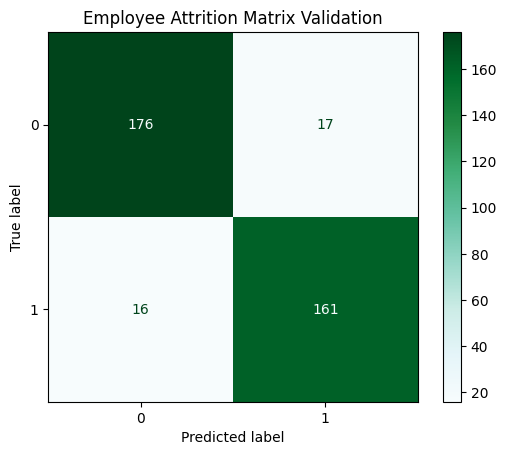

FPR for Validation E_Attrition: 0.08808290155440414
FNR for Validation E_Attrition: 0.0903954802259887


In [122]:
from sklearn.ensemble import GradientBoostingClassifier as E_AttGrb

Att_Eprm = { 'loss':['log_loss', 'exponential'],'learning_rate': [0.1, 0.3, 0.8],'n_estimators':[100, 140, 150, 200]}
Att_EMod = E_AttGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn)  ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

### Assessing FPR and FNR for the E_Attrition Model

EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       156
           1       0.94      0.88      0.91       214

    accuracy                           0.90       370
   macro avg       0.90      0.90      0.90       370
weighted avg       0.90      0.90      0.90       370



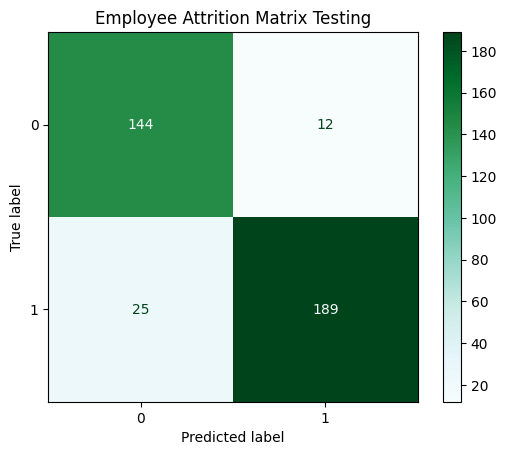

FPR for Testing E_Attrition: 0.07692307692307693
FNR for Testing E_Attrition: 0.11682242990654206


In [123]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

### Assessing FPR and FNR for the E_Attrition Model

EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

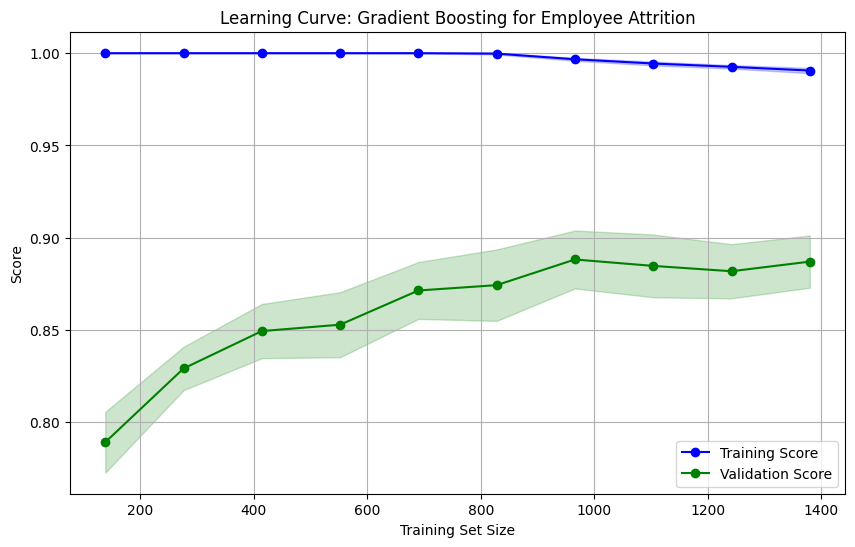

In [124]:
from sklearn.model_selection import learning_curve as AttLearnCurve
import numpy as E_Attnu

def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="GB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="blue", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="green", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="green", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttGrb(learning_rate= 0.1, loss= 'log_loss', n_estimators= 200) ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Gradient Boosting for Employee Attrition",
    cv=5
)

**Hist.Gradient Boosting Without Feature Selection**

{'learning_rate': 0.1, 'max_depth': 2, 'max_iter': 350}
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       193
           1       0.88      0.90      0.89       177

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.89      0.89      0.89       370



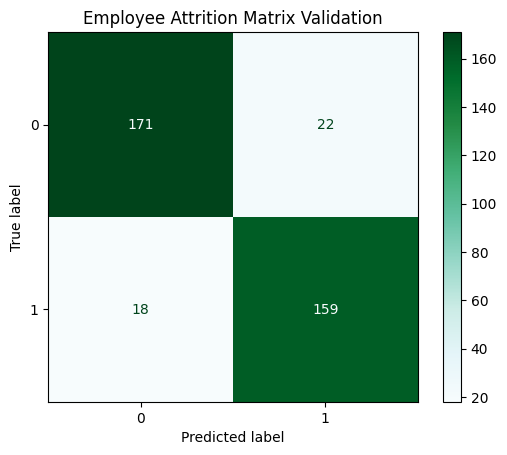

FPR for Validation E_Attrition: 0.11398963730569948
FNR for Validation E_Attrition: 0.1016949152542373


In [125]:
from sklearn.ensemble import HistGradientBoostingClassifier as E_AttHisGrb

Att_Eprm = {'learning_rate': [0.1, 0.3, 0.8],'max_iter':[100,200,350],'max_depth':[2,5,8,9]}
Att_EMod = E_AttHisGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttHisGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

### Assessing FPR and FNR for the E_Attrition Model

EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       156
           1       0.93      0.88      0.90       214

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.89      0.89      0.89       370



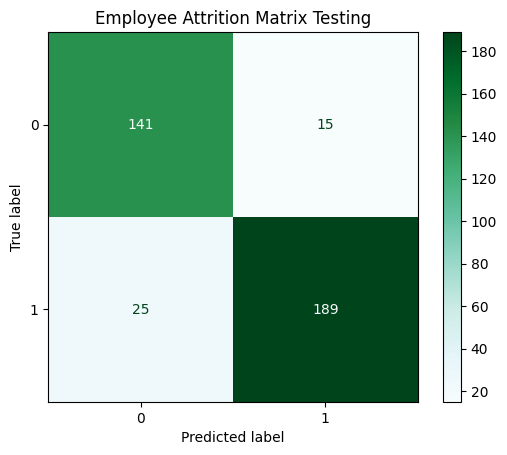

FPR for Testing E_Attrition: 0.09615384615384616
FNR for Testing E_Attrition: 0.11682242990654206


In [126]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ###  Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

### Assessing FPR and FNR for the E_Attrition Model

EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

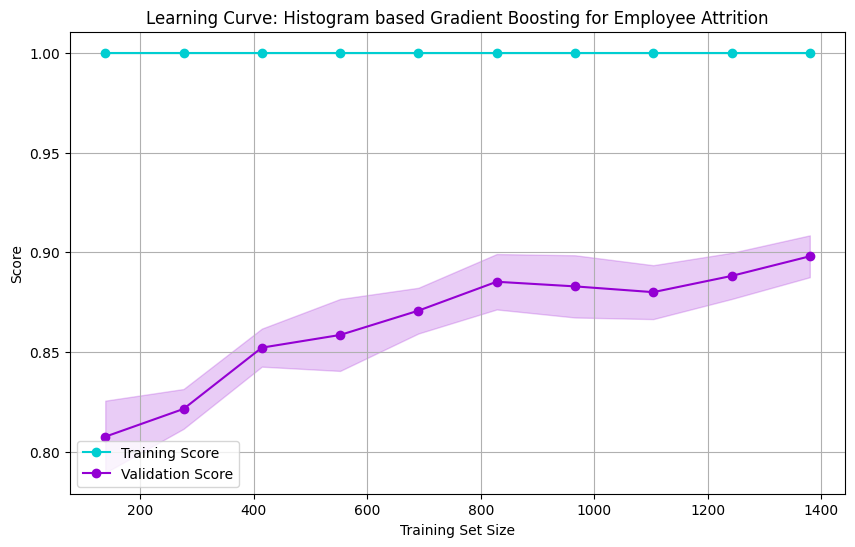

In [127]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="HistGB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttHisGrb(learning_rate= 0.8, max_depth= 2, max_iter= 200) ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Histogram based Gradient Boosting for Employee Attrition",
    cv=5
)

**Extreme Gradient Boosting Without Feature Selection**

In [128]:
pip install xgboost==2.1.2

In [129]:
pip install scikit-learn==1.3.0

{'learning_rate': 0.8, 'max_depth': 7, 'n_estimators': 140}
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       193
           1       0.89      0.89      0.89       177

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.89      0.89      0.89       370



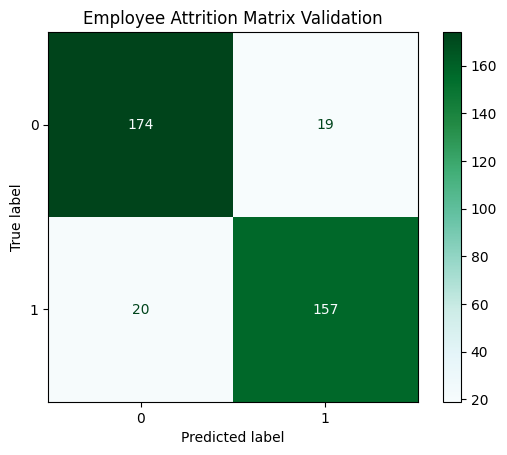

FPR for Validation E_Attrition: 0.09844559585492228
FNR for Validation E_Attrition: 0.11299435028248588


In [130]:
from xgboost import XGBClassifier as E_AttExGrb

Att_Eprm = { 'max_depth':[2,5,7,9],'learning_rate': [0.1, 0.3, 0.8],'n_estimators':[100, 140, 150, 200]}
Att_EMod = E_AttExGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttExGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

### Assessing FPR and FNR for the E_Attrition Model

EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       156
           1       0.94      0.88      0.91       214

    accuracy                           0.90       370
   macro avg       0.90      0.90      0.90       370
weighted avg       0.90      0.90      0.90       370



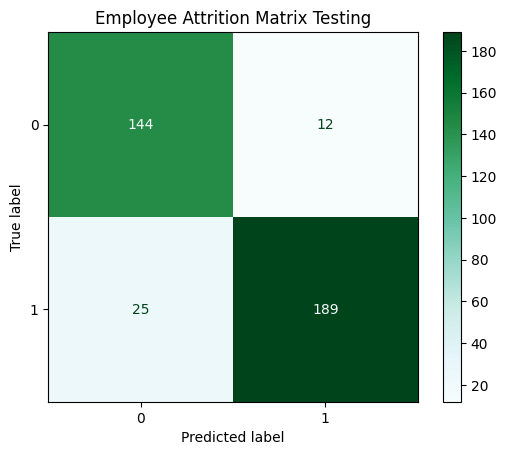

FPR for Testing E_Attrition: 0.07692307692307693
FNR for Testing E_Attrition: 0.11682242990654206


In [131]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

### Assessing FPR and FNR for the E_Attrition Model

EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")

print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

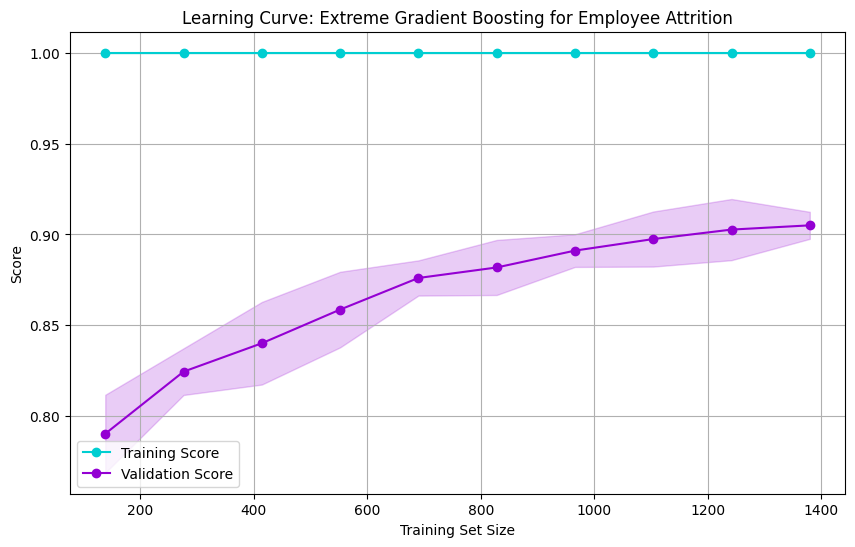

In [132]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="XGB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttExGrb(learning_rate= 0.1, max_depth= 9, n_estimators= 200) ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Extreme Gradient Boosting for Employee Attrition",
    cv=5
)

**Decision Tree Without Feature Selection**

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       193
           1       0.74      0.81      0.77       177

    accuracy                           0.77       370
   macro avg       0.77      0.77      0.77       370
weighted avg       0.78      0.77      0.77       370



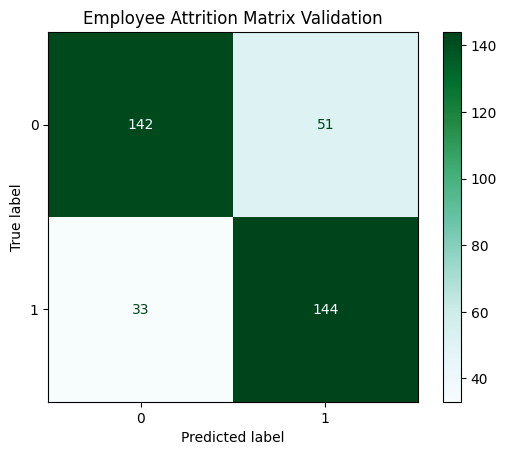

FPR for Validation E_Attrition: 0.26424870466321243
FNR for Validation E_Attrition: 0.1864406779661017


In [133]:
from sklearn.tree import DecisionTreeClassifier as E_AttDEC

Att_Eprm = {'criterion':['gini', 'entropy', 'log_loss'],'max_depth': [10, 5, 8, 3],'min_samples_split':[2, 4, 5, 7]}
Att_EMod = E_AttDEC(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttDEC(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

### Assessing FPR and FNR for the E_Attrition Model

EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       156
           1       0.81      0.84      0.82       214

    accuracy                           0.79       370
   macro avg       0.79      0.78      0.79       370
weighted avg       0.79      0.79      0.79       370



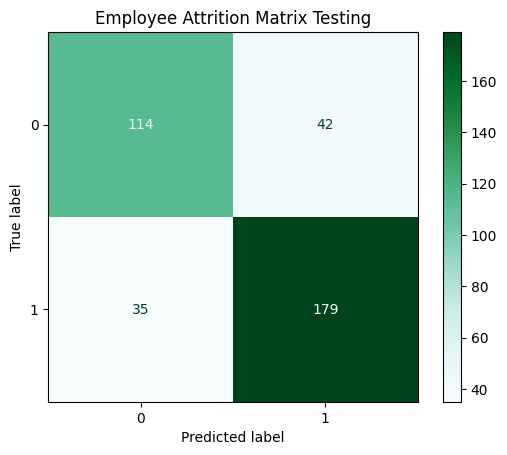

FPR for Testing E_Attrition: 0.2692307692307692
FNR for Testing E_Attrition: 0.16355140186915887


In [134]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)

print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

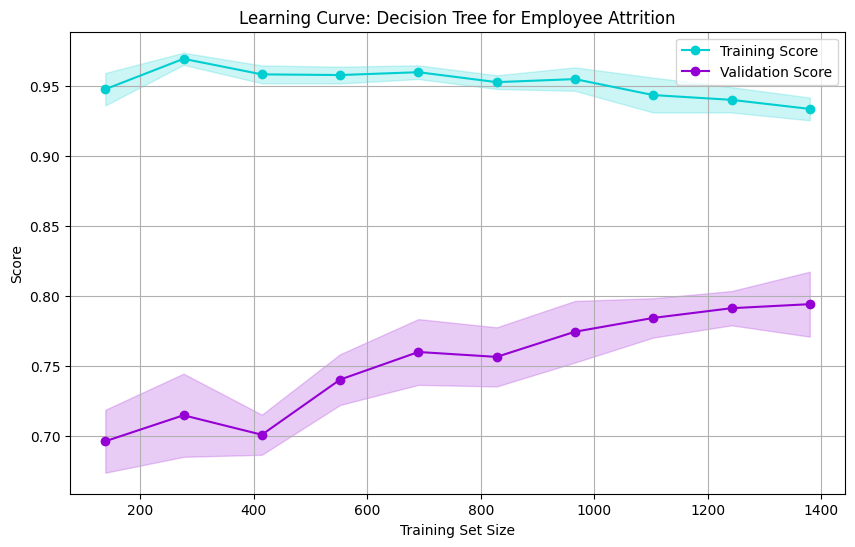

In [135]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="DT Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttDEC(criterion= 'gini', max_depth= 8, min_samples_split= 7) ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Decision Tree for Employee Attrition",
    cv=5
)

**MLP(Multi-Layered Preciption) without Feature Selection**

{'activation': 'tanh', 'hidden_layer_sizes': 20, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.58      0.63      0.60       193
           1       0.55      0.50      0.52       177

    accuracy                           0.56       370
   macro avg       0.56      0.56      0.56       370
weighted avg       0.56      0.56      0.56       370



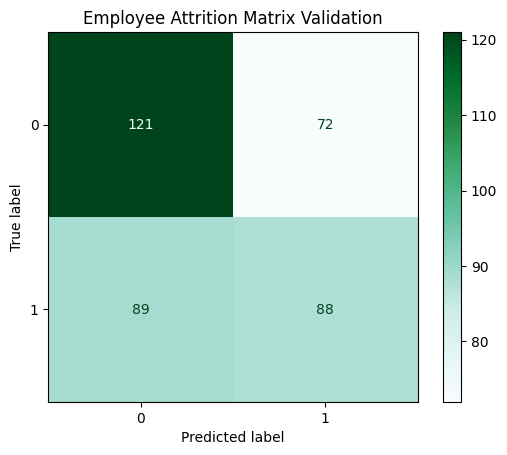

FPR for Validation E_Attrition: 0.37305699481865284
FNR for Validation E_Attrition: 0.5028248587570622


In [136]:
from sklearn.neural_network import MLPClassifier as E_AttMult

Att_Eprm = {'hidden_layer_sizes':[10, 20, 30],'activation': ['relu','tanh','logistic'],'solver':['lbfgs','adam','sgd']}
Att_EMod = E_AttMult(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttMult(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.45      0.59      0.51       156
           1       0.61      0.48      0.54       214

    accuracy                           0.52       370
   macro avg       0.53      0.53      0.52       370
weighted avg       0.55      0.52      0.53       370



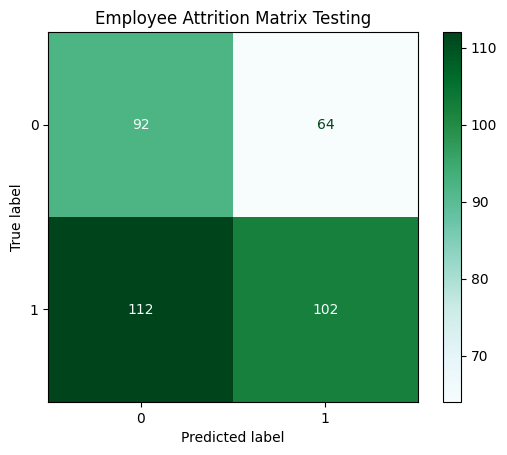

FPR for Testing E_Attrition: 0.41025641025641024
FNR for Testing E_Attrition: 0.5233644859813084


In [137]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

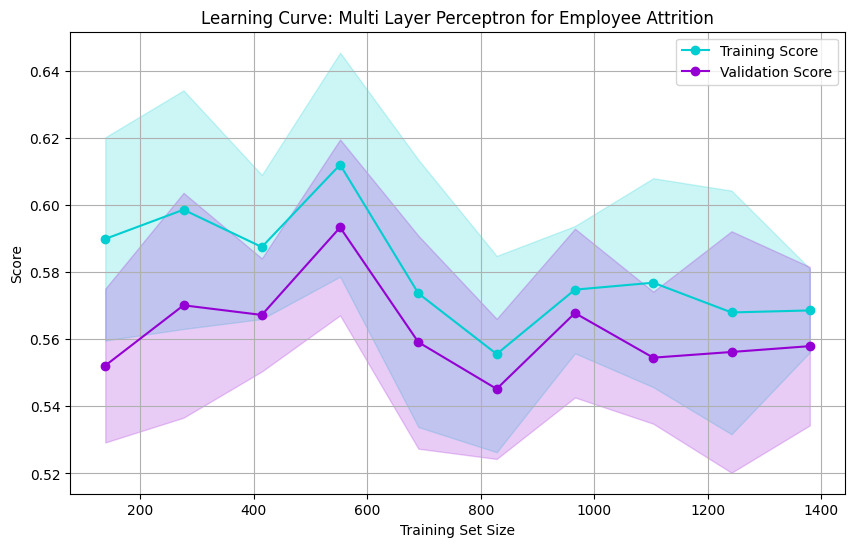

In [138]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="MLP Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttMult(activation= 'tanh', hidden_layer_sizes= 10, solver= 'lbfgs') ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Multi Layer Perceptron for Employee Attrition",
    cv=5
)

#**L1 FEATURE SELECTION FOR E_ATTRITION**

**L1 Feature Selection**

In [139]:
import pandas as E_AttPan
import seaborn as E_AttSea
import matplotlib.pyplot as E_AttPypl

E_Attrition = E_AttPan.read_csv('/content/drive/MyDrive/E_Attrition.csv')
E_Attrition

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,1,2,0,...,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,2,3,1,...,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,4,1,...,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,5,4,0,...,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,7,1,1,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,19,1,1367,1,11,1,3,771,3,0,...,2,0,0,3,2,0,0,0,0,1
2462,24,2,739,1,2,2,1,873,1,0,...,1,0,4,3,3,2,2,2,0,1
2463,27,2,1148,1,13,3,1,934,2,1,...,2,1,2,1,3,0,0,0,0,1
2464,47,1,799,1,7,2,2,1574,3,0,...,3,1,15,3,3,8,6,5,5,1


In [140]:
print("Employee Attrition Shape: ",E_Attrition.shape)
E_Attrition['Attrition'].value_counts()

Employee Attrition Shape:  (2466, 33)


,count
Attrition,
1,1233
0,1233


**Applying L1 Feature Selection**

In [141]:
from sklearn.linear_model import Lasso as E_AttritionL1

E_AttritionX = E_Attrition.drop('Attrition',axis=1)
E_AttritionY = E_Attrition['Attrition']

EAttMod = E_AttritionL1(alpha=0.01)
EAttMod.fit(E_AttritionX, E_AttritionY)

E_AttCoef = EAttMod.coef_      #### Determining the Best Features for Improved Accuracy
E_L1Feat = [e for e in range(len(E_AttCoef)) if E_AttCoef[e] != 1]
E_L1NFeatures = E_L1Feat[:20]   #### Choosing the Optimal Number of Features for Model Efficiency
E_SelFeatures = E_AttritionX.columns[E_L1NFeatures]

print('L1 Features for E_Attrition:\n', E_SelFeatures)
print('\nNumber of Features selected by L1 Feature Selection for E_Attrition:', len(E_SelFeatures))
E_AttritionX = E_AttritionX[E_SelFeatures]
E_AttritionX.shape

L1 Features for E_Attrition:
 Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18'],
      dtype='object')

Number of Features selected by L1 Feature Selection for E_Attrition: 20


(2466, 20)

In [142]:
from sklearn.model_selection import train_test_split as E_AttTSpl

### Splitting the Data into 70% for Training, 15% for Validation, and 15% for Testing
E_AttritionXtrn, E_AttritiontXtst, E_AttritionYtrn, E_AttritionYtst = E_AttTSpl(E_AttritionX,E_AttritionY,test_size=0.3,random_state= 7)
E_AttritionXvld, E_AttritiontXtst, E_AttritionYvld, E_AttritionYtst = E_AttTSpl(E_AttritiontXtst,E_AttritionYtst,test_size=0.5,random_state= 7)
print("\nTraining Samples for E_Attrition: ",E_AttritionXtrn.shape)
print("Validation Samples for E_Attrition: ",E_AttritionXvld.shape)
print("Testing Samples for E_Attrition: ",E_AttritiontXtst.shape)


Training Samples for E_Attrition:  (1726, 20)
Validation Samples for E_Attrition:  (370, 20)
Testing Samples for E_Attrition:  (370, 20)


In [143]:
from sklearn.model_selection import GridSearchCV as E_AttGsss
from sklearn import metrics as support_mtr
from sklearn.metrics import confusion_matrix as E_AttMx
from sklearn.metrics import ConfusionMatrixDisplay as Att_EMDS
from sklearn.metrics import classification_report as E_AttCR
import warnings as Att_EWARN
Att_EWARN.filterwarnings("ignore")
import matplotlib.pyplot as E_AttPypl

**Gradient Boosting Using L1 Feature Selection**

{'learning_rate': 0.3, 'loss': 'log_loss', 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       193
           1       0.84      0.87      0.85       177

    accuracy                           0.86       370
   macro avg       0.86      0.86      0.86       370
weighted avg       0.86      0.86      0.86       370



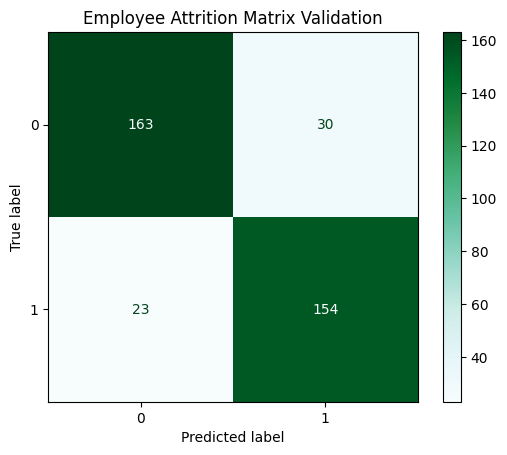

FPR for Validation E_Attrition: 0.15544041450777202
FNR for Validation E_Attrition: 0.12994350282485875


In [144]:
from sklearn.ensemble import GradientBoostingClassifier as E_AttGrb

Att_Eprm = { 'loss':['log_loss', 'exponential'],'learning_rate': [0.1, 0.3, 0.8],'n_estimators':[100, 140, 150, 200]}
Att_EMod = E_AttGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       156
           1       0.93      0.86      0.89       214

    accuracy                           0.88       370
   macro avg       0.87      0.88      0.88       370
weighted avg       0.88      0.88      0.88       370



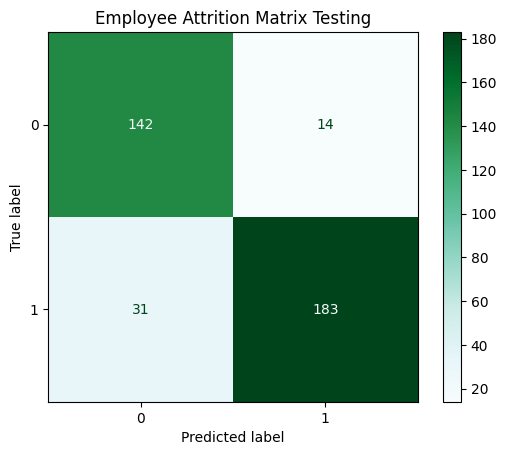

FPR for Testing E_Attrition: 0.08974358974358974
FNR for Testing E_Attrition: 0.14485981308411214


In [145]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

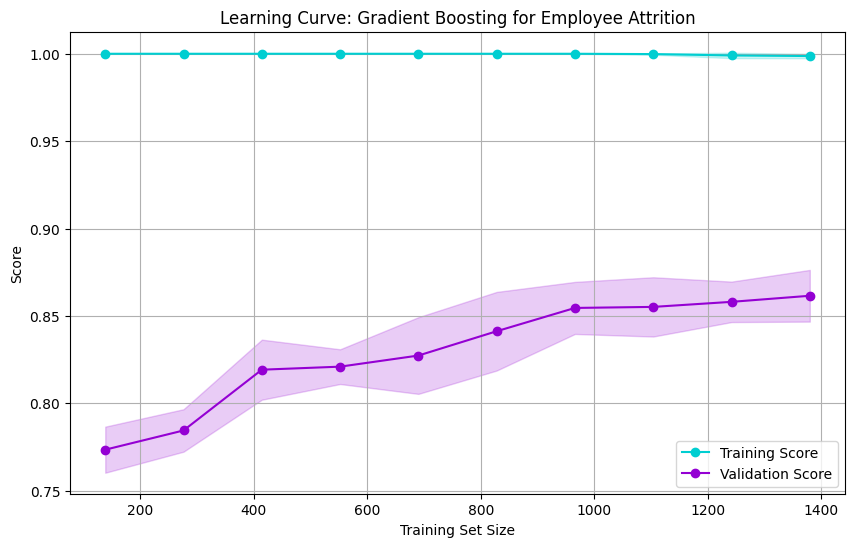

In [146]:
from sklearn.model_selection import learning_curve as AttLearnCurve
import numpy as E_Attnu

def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="GB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttGrb(learning_rate= 0.3, loss= 'log_loss', n_estimators= 140) ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Gradient Boosting for Employee Attrition",
    cv=5
)

**Hist.Gradient Boosting L1 Feature Selection**

{'learning_rate': 0.8, 'max_depth': 5, 'max_iter': 200}
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       193
           1       0.87      0.89      0.88       177

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.88      0.88      0.88       370



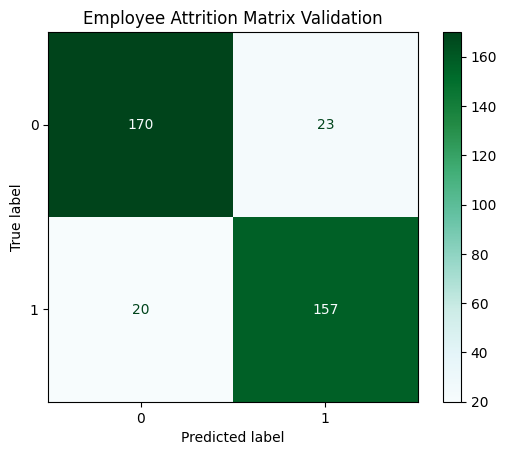

FPR for Validation E_Attrition: 0.11917098445595854
FNR for Validation E_Attrition: 0.11299435028248588


In [147]:
from sklearn.ensemble import HistGradientBoostingClassifier as E_AttHisGrb

Att_Eprm = {'learning_rate': [0.1, 0.3, 0.8],'max_iter':[100,200,350],'max_depth':[2,5,8,9]}
Att_EMod = E_AttHisGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttHisGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       156
           1       0.91      0.86      0.89       214

    accuracy                           0.87       370
   macro avg       0.87      0.87      0.87       370
weighted avg       0.88      0.87      0.87       370



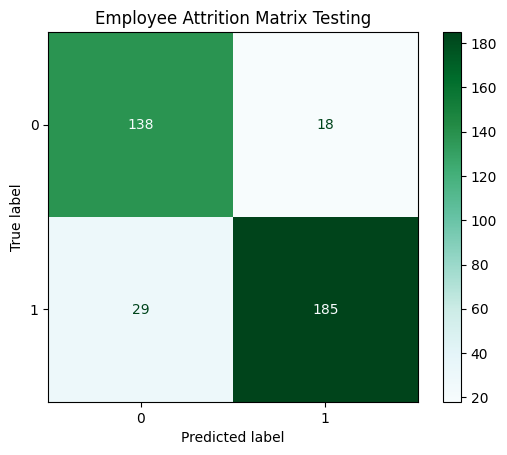

FPR for Testing E_Attrition: 0.11538461538461539
FNR for Testing E_Attrition: 0.13551401869158877


In [148]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

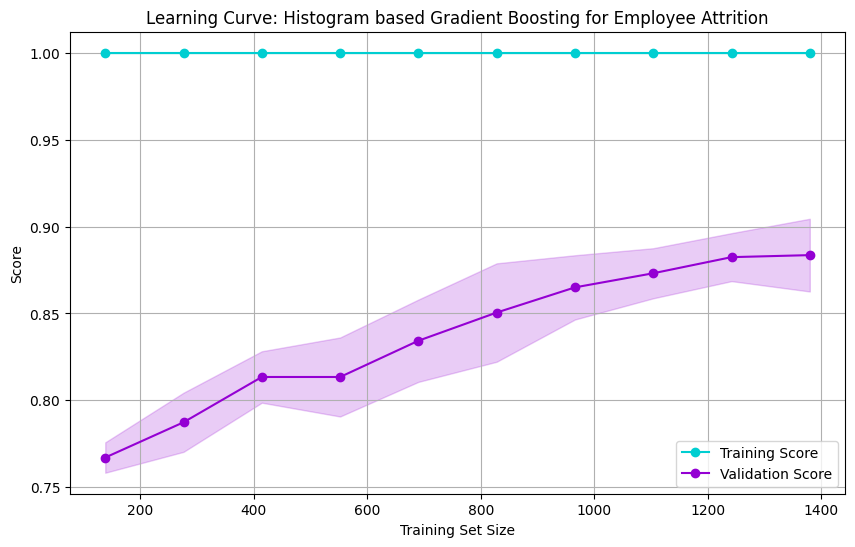

In [149]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="HistGB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttHisGrb(learning_rate= 0.8, max_depth= 5, max_iter= 200) ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Histogram based Gradient Boosting for Employee Attrition",
    cv=5
)

**Extreme Gradient Boosting L1 Feature Selection**

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       193
           1       0.83      0.86      0.85       177

    accuracy                           0.85       370
   macro avg       0.85      0.85      0.85       370
weighted avg       0.85      0.85      0.85       370



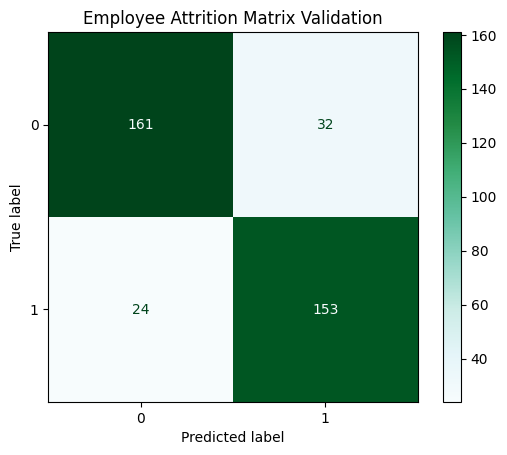

FPR for Validation E_Attrition: 0.16580310880829016
FNR for Validation E_Attrition: 0.13559322033898305


In [150]:
from xgboost import XGBClassifier as E_AttExGrb

Att_Eprm = { 'max_depth':[2,5,7,9],'learning_rate': [0.1, 0.3, 0.8],'n_estimators':[100, 140, 150, 200]}
Att_EMod = E_AttExGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttExGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       156
           1       0.91      0.83      0.87       214

    accuracy                           0.86       370
   macro avg       0.85      0.86      0.86       370
weighted avg       0.86      0.86      0.86       370



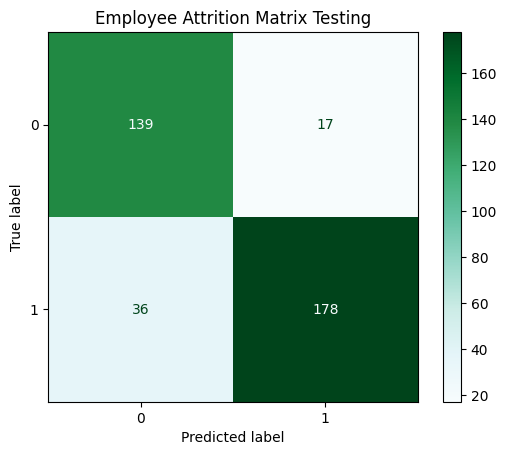

FPR for Testing E_Attrition: 0.10897435897435898
FNR for Testing E_Attrition: 0.16822429906542055


In [151]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

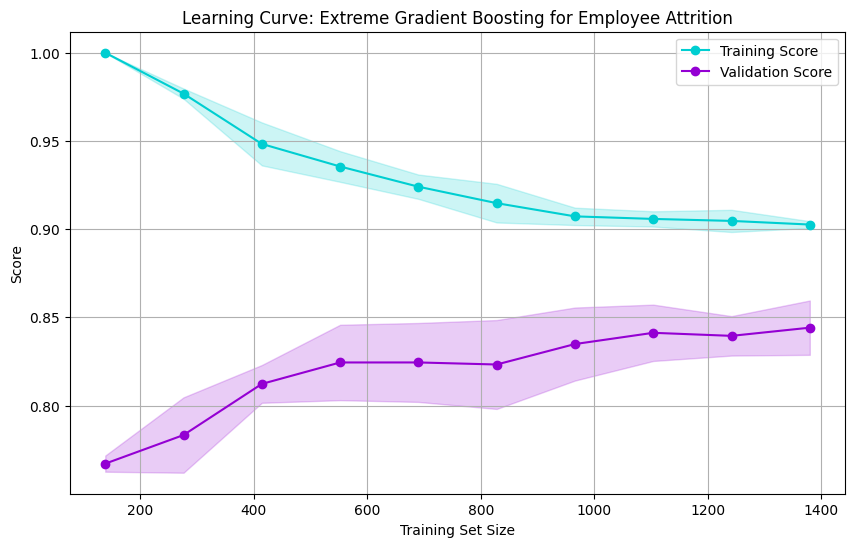

In [152]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="XGB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttExGrb(learning_rate= 0.1, max_depth= 2, n_estimators= 200) ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Extreme Gradient Boosting for Employee Attrition",
    cv=5
)

**Decision Tree Using L1 Feature Selection**

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 4}
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       193
           1       0.75      0.80      0.77       177

    accuracy                           0.78       370
   macro avg       0.78      0.78      0.78       370
weighted avg       0.78      0.78      0.78       370



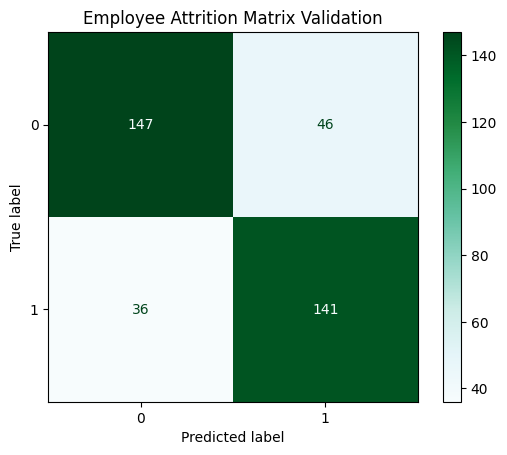

FPR for Validation E_Attrition: 0.23834196891191708
FNR for Validation E_Attrition: 0.2033898305084746


In [153]:
from sklearn.tree import DecisionTreeClassifier as E_AttDEC

Att_Eprm = {'criterion':['gini', 'entropy', 'log_loss'],'max_depth': [10, 5, 8, 3],'min_samples_split':[2, 4, 5, 7]}
Att_EMod = E_AttDEC(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttDEC(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       156
           1       0.80      0.79      0.80       214

    accuracy                           0.77       370
   macro avg       0.76      0.76      0.76       370
weighted avg       0.77      0.77      0.77       370



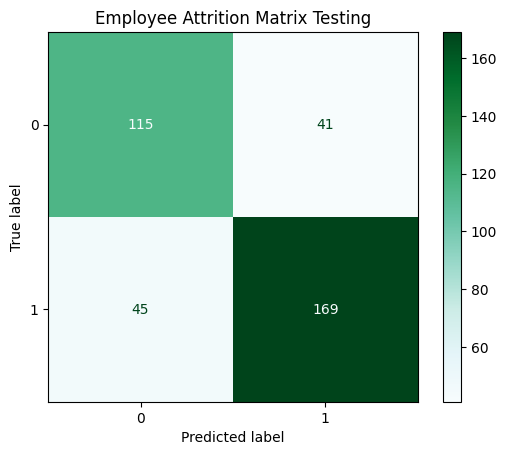

FPR for Testing E_Attrition: 0.26282051282051283
FNR for Testing E_Attrition: 0.2102803738317757


In [154]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

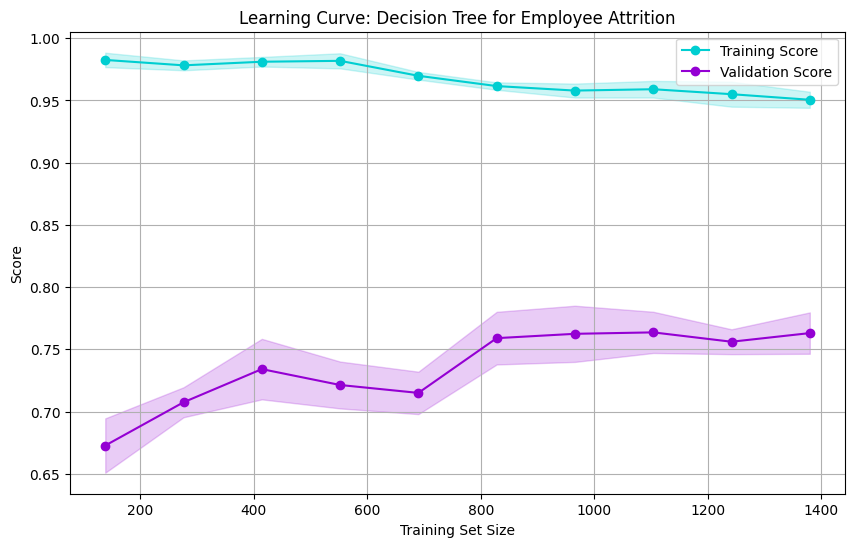

In [155]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="DT Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttDEC(criterion= 'gini', max_depth= 10, min_samples_split= 4) ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Decision Tree for Employee Attrition",
    cv=5
)

**MLP Using L1 Feature Selection**

{'activation': 'logistic', 'hidden_layer_sizes': 10, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.70      0.32      0.44       193
           1       0.53      0.85      0.66       177

    accuracy                           0.57       370
   macro avg       0.62      0.58      0.55       370
weighted avg       0.62      0.57      0.54       370



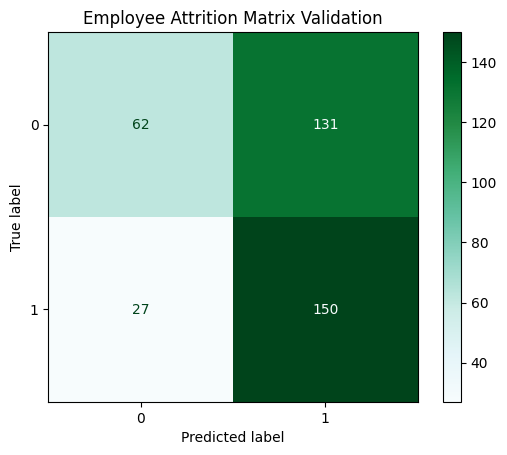

FPR for Validation E_Attrition: 0.6787564766839378
FNR for Validation E_Attrition: 0.15254237288135594


In [156]:
from sklearn.neural_network import MLPClassifier as E_AttMult

Att_Eprm = {'hidden_layer_sizes':[10, 20, 30],'activation': ['relu','tanh','logistic'],'solver':['lbfgs','adam','sgd']}
Att_EMod = E_AttMult(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttMult(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.62      0.29      0.39       156
           1       0.63      0.87      0.73       214

    accuracy                           0.62       370
   macro avg       0.62      0.58      0.56       370
weighted avg       0.62      0.62      0.59       370



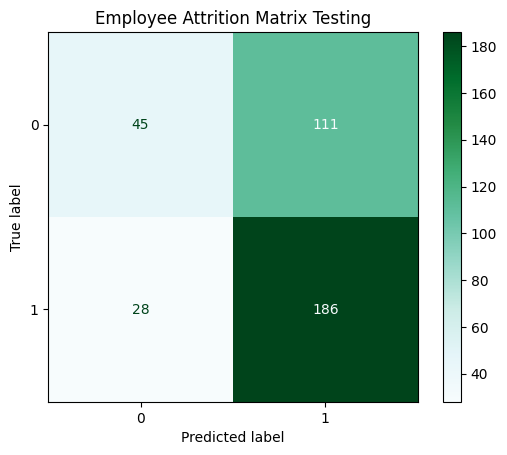

FPR for Testing E_Attrition: 0.7115384615384616
FNR for Testing E_Attrition: 0.1308411214953271


In [157]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

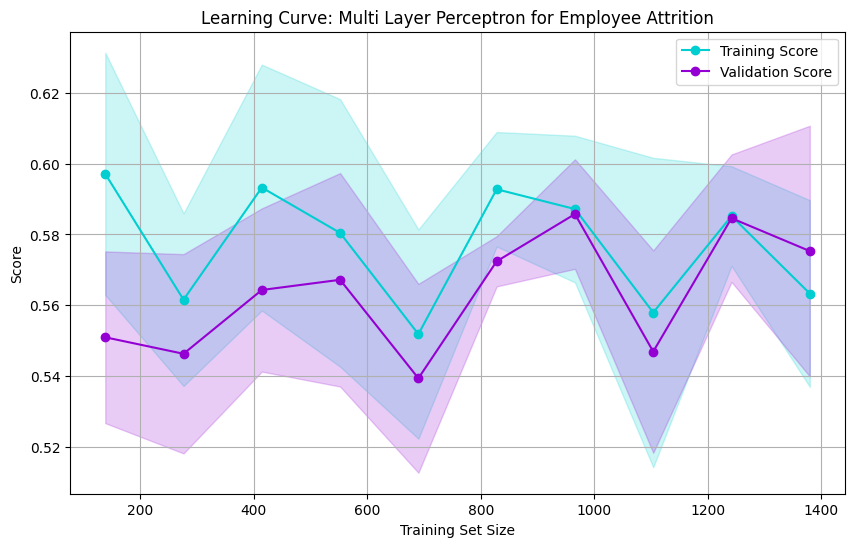

In [158]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="MLP Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttMult(activation= 'logistic', hidden_layer_sizes= 10, solver= 'lbfgs') ### using the best parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Multi Layer Perceptron for Employee Attrition",
    cv=5
)

#RECURSIVE FEATURE ELIMINATION(RFE) FOR E_ATTRITION

**Recursive Feature Elimination (RFE Features)**

In [159]:
import pandas as E_AttPan
import seaborn as E_AttSea
import matplotlib.pyplot as E_AttPypl
E_Attrition = E_AttPan.read_csv('/content/drive/MyDrive/E_Attrition.csv')
E_Attrition

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,1,2,0,...,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,2,3,1,...,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,4,1,...,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,5,4,0,...,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,7,1,1,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,19,1,1367,1,11,1,3,771,3,0,...,2,0,0,3,2,0,0,0,0,1
2462,24,2,739,1,2,2,1,873,1,0,...,1,0,4,3,3,2,2,2,0,1
2463,27,2,1148,1,13,3,1,934,2,1,...,2,1,2,1,3,0,0,0,0,1
2464,47,1,799,1,7,2,2,1574,3,0,...,3,1,15,3,3,8,6,5,5,1


In [160]:
from sklearn.feature_selection import RFE as E_ATTRFE
from sklearn.linear_model import LogisticRegression
import warnings as Att_EWARN
Att_EWARN.filterwarnings("ignore")

E_AttritionX = E_Attrition.drop('Attrition',axis=1)
E_AttritionY = E_Attrition['Attrition']
E_AttLR = LogisticRegression(random_state=7)

#### Using Recursive Feature Elimination Technique (RFE)
E_AttRFEMod = E_ATTRFE(estimator=E_AttLR, n_features_to_select=20)  #### Choosing the Optimal Number of Features for Model Efficiency
E_AttRFEMod.fit(E_AttritionX, E_AttritionY)

#### Listing the Indices and Names of the Selected Features
E_SelFeatures = E_AttritionX.columns[E_AttRFEMod.support_]
print('\nFeatures for E_Attrition:\n', E_SelFeatures)
print('\nNumber of Features selected by L1 Feature Selection for E_Attrition:', len(E_SelFeatures))

E_AttritionX = E_AttritionX[E_SelFeatures]
E_AttritionX.shape


Features for E_Attrition:
 Index(['BusinessTravel', 'Department', 'Education', 'EnvironmentSatisfaction',
       'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Number of Features selected by L1 Feature Selection for E_Attrition: 20


(2466, 20)

In [161]:
from sklearn.model_selection import train_test_split as E_AttTSpl

#### Splitting the Data into 70% for Training, 15% for Validation, and 15% for Testing
E_AttritionXtrn, E_AttritiontXtst, E_AttritionYtrn, E_AttritionYtst = E_AttTSpl(E_AttritionX,E_AttritionY,test_size=0.3,random_state= 7)
E_AttritionXvld, E_AttritiontXtst, E_AttritionYvld, E_AttritionYtst = E_AttTSpl(E_AttritiontXtst,E_AttritionYtst,test_size=0.5,random_state= 7)
print("\nTraining Samples for E_Attrition: ",E_AttritionXtrn.shape)
print("Validation Samples for E_Attrition: ",E_AttritionXvld.shape)
print("Testing Samples for E_Attrition: ",E_AttritiontXtst.shape)


Training Samples for E_Attrition:  (1726, 20)
Validation Samples for E_Attrition:  (370, 20)
Testing Samples for E_Attrition:  (370, 20)


In [162]:
from sklearn.model_selection import GridSearchCV as E_AttGsss
from sklearn import metrics as support_mtr
from sklearn.metrics import confusion_matrix as E_AttMx
from sklearn.metrics import ConfusionMatrixDisplay as Att_EMDS
from sklearn.metrics import classification_report as E_AttCR
import warnings as Att_EWARN
Att_EWARN.filterwarnings("ignore")
import matplotlib.pyplot as E_AttPypl

**Gradient Boosting Using RFE(Recursive Feature Elimination)**

{'learning_rate': 0.8, 'loss': 'log_loss', 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       193
           1       0.88      0.87      0.87       177

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.88      0.88      0.88       370



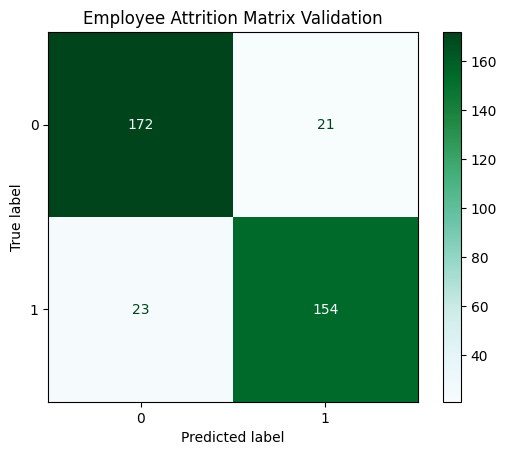

FPR for Validation E_Attrition: 0.10880829015544041
FNR for Validation E_Attrition: 0.12994350282485875


In [163]:
from sklearn.ensemble import GradientBoostingClassifier as E_AttGrb

Att_Eprm = { 'loss':['log_loss', 'exponential'],'learning_rate': [0.1, 0.3, 0.8],'n_estimators':[100, 140, 150, 200]}
Att_EMod = E_AttGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       156
           1       0.89      0.84      0.87       214

    accuracy                           0.85       370
   macro avg       0.84      0.85      0.85       370
weighted avg       0.85      0.85      0.85       370



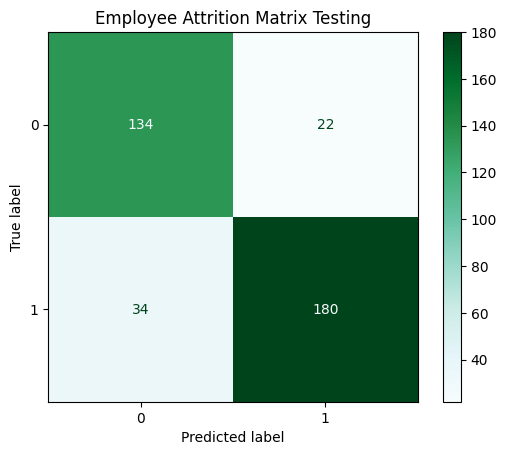

FPR for Testing E_Attrition: 0.14102564102564102
FNR for Testing E_Attrition: 0.1588785046728972


In [164]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

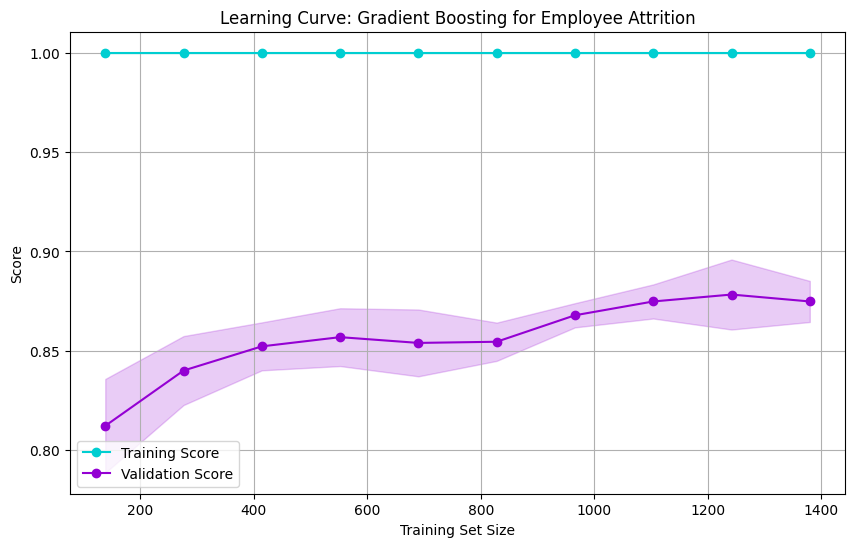

In [165]:
from sklearn.model_selection import learning_curve as AttLearnCurve
import numpy as E_Attnu

def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="GB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttGrb(learning_rate= 0.8, loss= 'log_loss', n_estimators= 150) ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Gradient Boosting for Employee Attrition",
    cv=5
)

**Hist.Gradient Boosting using RFE(Recursive Feature Elimination)**

{'learning_rate': 0.1, 'max_depth': 2, 'max_iter': 350}
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       193
           1       0.89      0.89      0.89       177

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.89      0.89      0.89       370



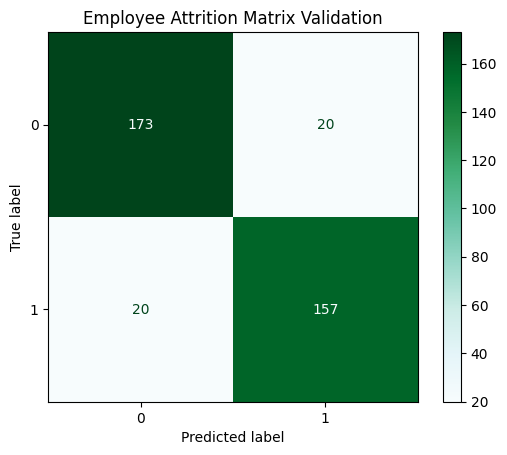

FPR for Validation E_Attrition: 0.10362694300518134
FNR for Validation E_Attrition: 0.11299435028248588


In [166]:
from sklearn.ensemble import HistGradientBoostingClassifier as E_AttHisGrb

Att_Eprm = {'learning_rate': [0.1, 0.3, 0.8],'max_iter':[100,200,350],'max_depth':[2,5,8,9]}
Att_EMod = E_AttHisGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttHisGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       156
           1       0.92      0.82      0.87       214

    accuracy                           0.86       370
   macro avg       0.85      0.86      0.86       370
weighted avg       0.87      0.86      0.86       370



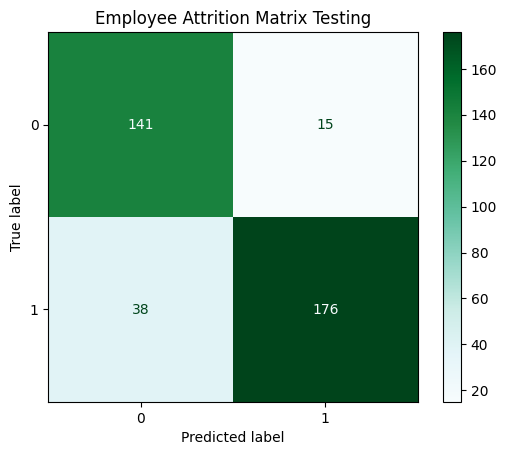

FPR for Testing E_Attrition: 0.09615384615384616
FNR for Testing E_Attrition: 0.17757009345794392


In [167]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

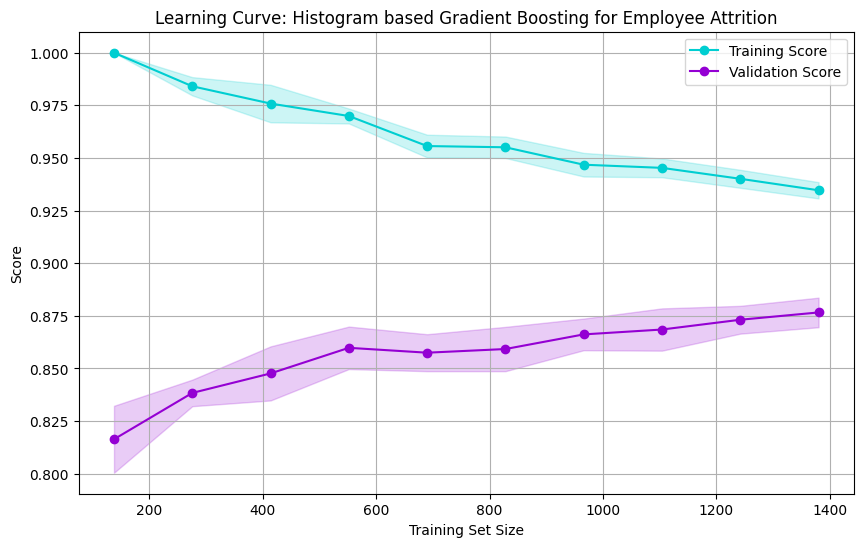

In [168]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="HistGB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttHisGrb(learning_rate= 0.1, max_depth= 2, max_iter= 350) ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Histogram based Gradient Boosting for Employee Attrition",
    cv=5
)

**Extreme Gradient Boosting using RFE(Recursive Feature Elimination)**

{'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       193
           1       0.90      0.89      0.90       177

    accuracy                           0.90       370
   macro avg       0.90      0.90      0.90       370
weighted avg       0.90      0.90      0.90       370



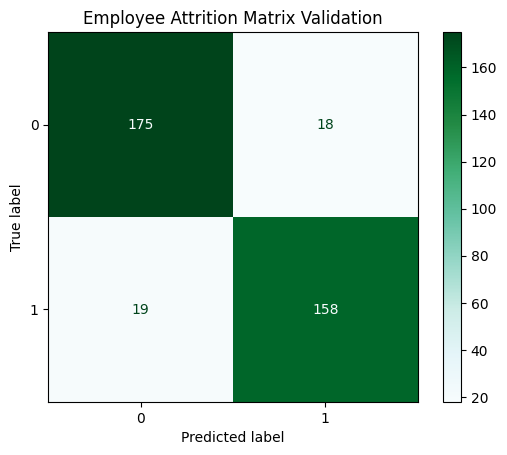

FPR for Validation E_Attrition: 0.09326424870466321
FNR for Validation E_Attrition: 0.10734463276836158


In [169]:
from xgboost import XGBClassifier as E_AttExGrb

Att_Eprm = { 'max_depth':[2,5,7,9],'learning_rate': [0.1, 0.3, 0.8],'n_estimators':[100, 140, 150, 200]}
Att_EMod = E_AttExGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttExGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       156
           1       0.92      0.84      0.88       214

    accuracy                           0.86       370
   macro avg       0.86      0.87      0.86       370
weighted avg       0.87      0.86      0.87       370



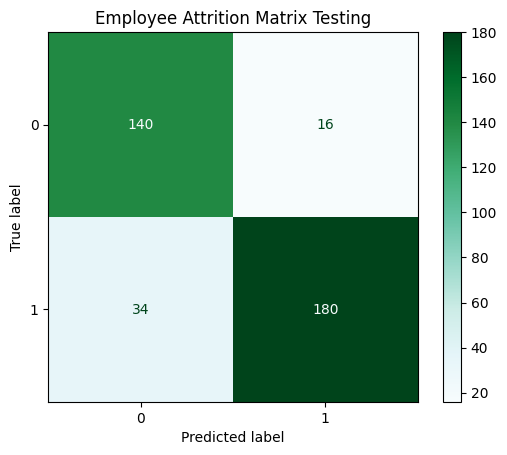

FPR for Testing E_Attrition: 0.10256410256410256
FNR for Testing E_Attrition: 0.1588785046728972


In [170]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

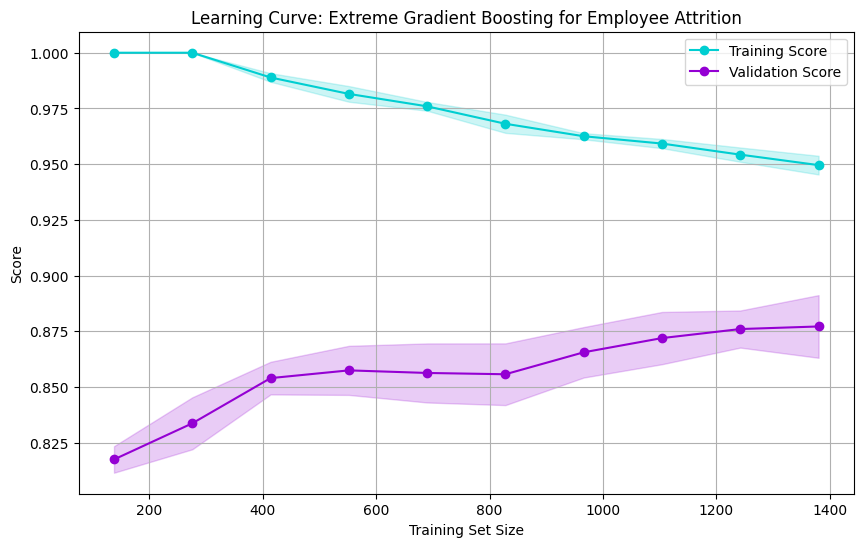

In [171]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="XGB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttExGrb(learning_rate= 0.3, max_depth= 2, n_estimators= 200) ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Extreme Gradient Boosting for Employee Attrition",
    cv=5
)

**Decision Tree Using RFE(Recursive Feature Elimination)**

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       193
           1       0.79      0.82      0.81       177

    accuracy                           0.81       370
   macro avg       0.81      0.81      0.81       370
weighted avg       0.81      0.81      0.81       370



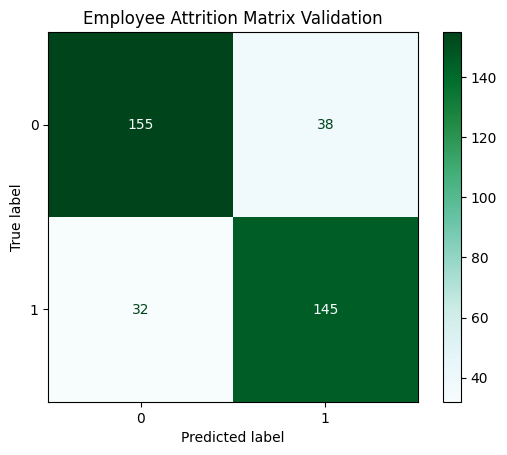

FPR for Validation E_Attrition: 0.19689119170984457
FNR for Validation E_Attrition: 0.1807909604519774


In [172]:
from sklearn.tree import DecisionTreeClassifier as E_AttDEC

Att_Eprm = {'criterion':['gini', 'entropy', 'log_loss'],'max_depth': [10, 5, 8, 3],'min_samples_split':[2, 4, 5, 7]}
Att_EMod = E_AttDEC(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttDEC(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       156
           1       0.88      0.79      0.84       214

    accuracy                           0.82       370
   macro avg       0.82      0.82      0.82       370
weighted avg       0.83      0.82      0.82       370



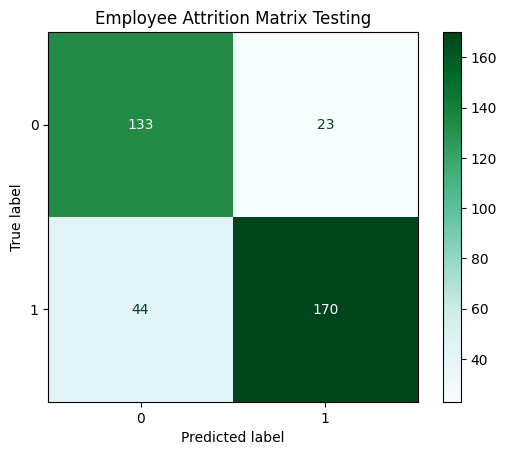

FPR for Testing E_Attrition: 0.14743589743589744
FNR for Testing E_Attrition: 0.205607476635514


In [173]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

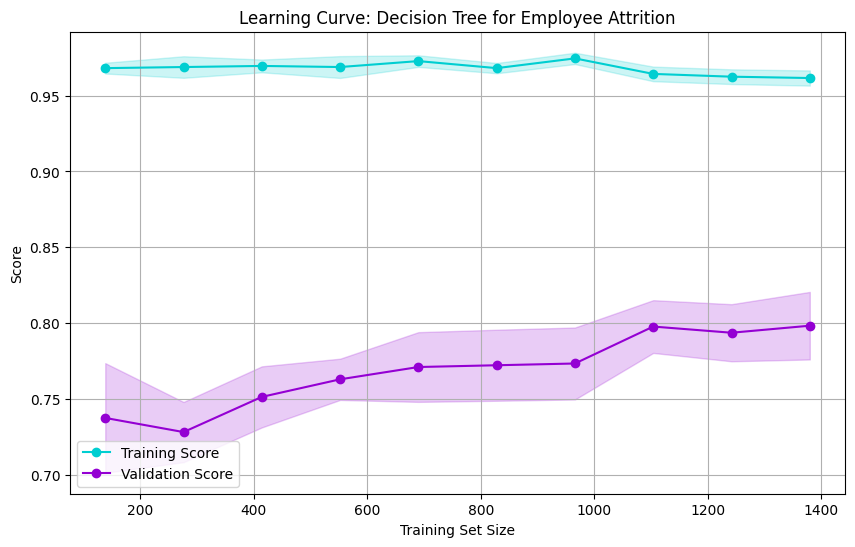

In [174]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="DT Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttDEC(criterion= 'entropy', max_depth= 10, min_samples_split= 5) ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Decision Tree for Employee Attrition",
    cv=5
)

 **Multi-Layer Perceptron (MLP) using RFE(Recursive Feature Elimination)**

{'activation': 'relu', 'hidden_layer_sizes': 30, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       193
           1       0.81      0.87      0.84       177

    accuracy                           0.84       370
   macro avg       0.84      0.84      0.84       370
weighted avg       0.84      0.84      0.84       370



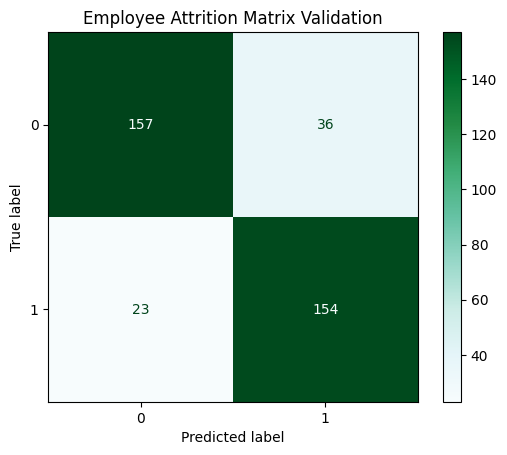

FPR for Validation E_Attrition: 0.18652849740932642
FNR for Validation E_Attrition: 0.12994350282485875


In [175]:
from sklearn.neural_network import MLPClassifier as E_AttMult

Att_Eprm = {'hidden_layer_sizes':[10, 20, 30],'activation': ['relu','tanh','logistic'],'solver':['lbfgs','adam','sgd']}
Att_EMod = E_AttMult(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttMult(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       156
           1       0.87      0.85      0.86       214

    accuracy                           0.84       370
   macro avg       0.84      0.84      0.84       370
weighted avg       0.84      0.84      0.84       370



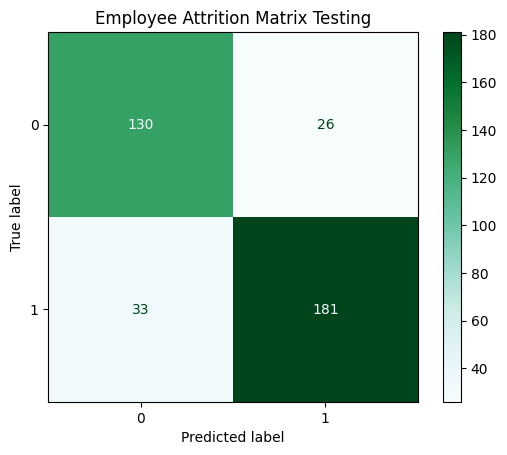

FPR for Testing E_Attrition: 0.16666666666666666
FNR for Testing E_Attrition: 0.1542056074766355


In [176]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

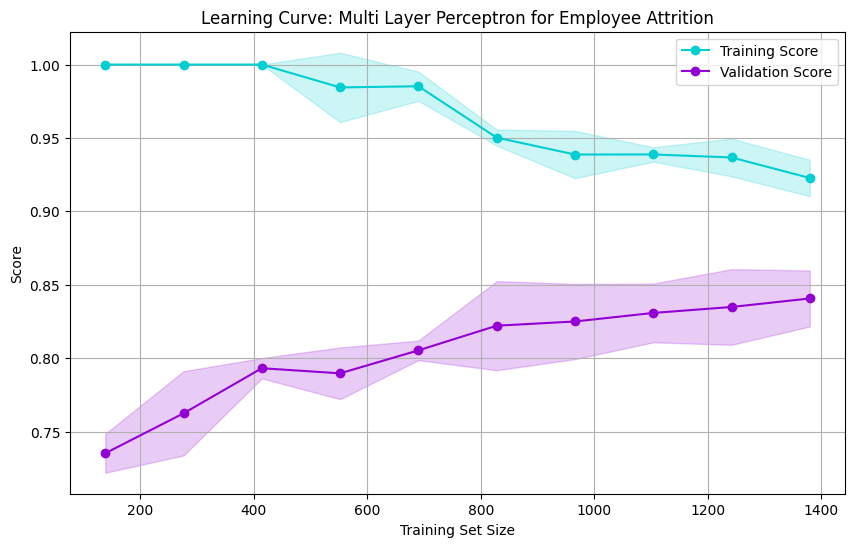

In [177]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="MLP Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttMult(activation= 'relu', hidden_layer_sizes= 30, solver= 'lbfgs') ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Multi Layer Perceptron for Employee Attrition",
    cv=5
)

#UNION OF L1 AND RFE FEATURES FOR ATTRITION

**Union of L1 and RFE Features**

In [178]:
import pandas as E_AttPan
import seaborn as E_AttSea
import matplotlib.pyplot as E_AttPypl
E_Attrition = E_AttPan.read_csv('/content/drive/MyDrive/E_Attrition.csv')
E_Attrition

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,1,2,0,...,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,2,3,1,...,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,4,1,...,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,5,4,0,...,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,7,1,1,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,19,1,1367,1,11,1,3,771,3,0,...,2,0,0,3,2,0,0,0,0,1
2462,24,2,739,1,2,2,1,873,1,0,...,1,0,4,3,3,2,2,2,0,1
2463,27,2,1148,1,13,3,1,934,2,1,...,2,1,2,1,3,0,0,0,0,1
2464,47,1,799,1,7,2,2,1574,3,0,...,3,1,15,3,3,8,6,5,5,1


In [179]:
### Displaying the Selected Features Lists from L1 Regularization and RFE

E_AttritionX = E_Attrition.drop('Attrition',axis=1)
E_AttritionY = E_Attrition['Attrition']

L1_Empfeatures = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18']

RFE_Empfeatures = ['BusinessTravel', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

### Converting Feature Lists into Sets to Perform Set Operations
L1_features_Empset = set(L1_Empfeatures)
RFE_features_Empset = set(RFE_Empfeatures)

union_Empfeatures = L1_features_Empset.union(RFE_features_Empset)
union_Empfeatures_list = list(union_Empfeatures)

print("Union of L1 and RFE Selected Features for E_Attrition:\n", union_Empfeatures_list)
print("Number of Features in Union:", len(union_Empfeatures_list))
E_AttritionX = E_AttritionX[union_Empfeatures_list]

Union of L1 and RFE Selected Features for E_Attrition:
 ['PerformanceRating', 'Education', 'MonthlyIncome', 'EmployeeNumber', 'YearsInCurrentRole', 'EducationField', 'JobLevel', 'StockOptionLevel', 'MaritalStatus', 'DistanceFromHome', 'TrainingTimesLastYear', 'Age', 'HourlyRate', 'MonthlyRate', 'RelationshipSatisfaction', 'Gender', 'JobRole', 'EnvironmentSatisfaction', 'NumCompaniesWorked', 'Over18', 'YearsWithCurrManager', 'BusinessTravel', 'OverTime', 'Department', 'YearsSinceLastPromotion', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'DailyRate']
Number of Features in Union: 29


In [180]:
from sklearn.model_selection import train_test_split as E_AttTSpl

### Splitting the Data into 70% for Training, 15% for Validation, and 15% for Testing

E_AttritionXtrn, E_AttritiontXtst, E_AttritionYtrn, E_AttritionYtst = E_AttTSpl(E_AttritionX,E_AttritionY,test_size=0.3,random_state= 7)
E_AttritionXvld, E_AttritiontXtst, E_AttritionYvld, E_AttritionYtst = E_AttTSpl(E_AttritiontXtst,E_AttritionYtst,test_size=0.5,random_state= 7)
print("\nTraining Samples for E_Attrition: ",E_AttritionXtrn.shape)
print("Validation Samples for E_Attrition: ",E_AttritionXvld.shape)
print("Testing Samples for E_Attrition: ",E_AttritiontXtst.shape)


Training Samples for E_Attrition:  (1726, 29)
Validation Samples for E_Attrition:  (370, 29)
Testing Samples for E_Attrition:  (370, 29)


In [181]:
from sklearn.model_selection import GridSearchCV as E_AttGsss
from sklearn import metrics as support_mtr
from sklearn.metrics import confusion_matrix as E_AttMx
from sklearn.metrics import ConfusionMatrixDisplay as Att_EMDS
from sklearn.metrics import classification_report as E_AttCR
import warnings as Att_EWARN
Att_EWARN.filterwarnings("ignore")
import matplotlib.pyplot as E_AttPypl

**Gradient Boosting Using Union Features**

{'learning_rate': 0.8, 'loss': 'log_loss', 'n_estimators': 140}
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       193
           1       0.85      0.93      0.89       177

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.90      0.89      0.89       370



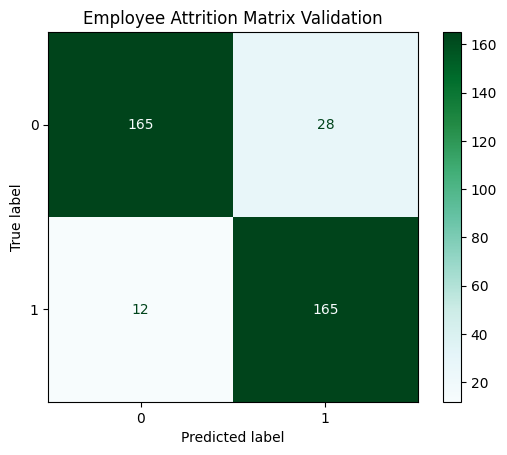

FPR for Validation E_Attrition: 0.14507772020725387
FNR for Validation E_Attrition: 0.06779661016949153


In [182]:
from sklearn.ensemble import GradientBoostingClassifier as E_AttGrb

Att_Eprm = { 'loss':['log_loss', 'exponential'],'learning_rate': [0.1, 0.3, 0.8],'n_estimators':[100, 140, 150, 200]}
Att_EMod = E_AttGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       156
           1       0.91      0.89      0.90       214

    accuracy                           0.89       370
   macro avg       0.88      0.89      0.88       370
weighted avg       0.89      0.89      0.89       370



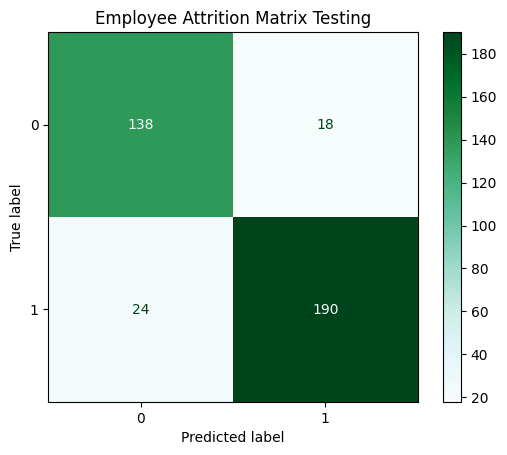

FPR for Testing E_Attrition: 0.11538461538461539
FNR for Testing E_Attrition: 0.11214953271028037


In [183]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

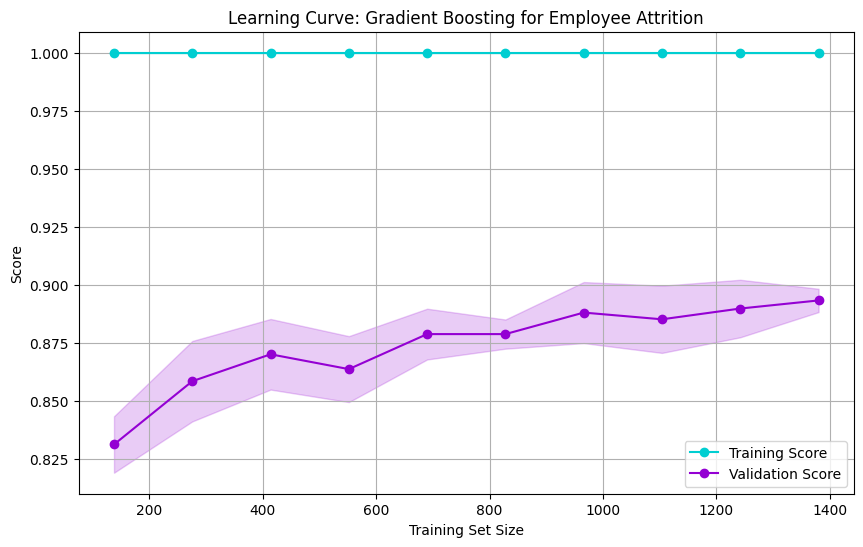

In [184]:
from sklearn.model_selection import learning_curve as AttLearnCurve
import numpy as E_Attnu

def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="GB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttGrb(learning_rate= 0.8, loss= 'log_loss', n_estimators= 140) ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Gradient Boosting for Employee Attrition",
    cv=5
)

**Hist.Gradient Boosting Using Union Features**

{'learning_rate': 0.8, 'max_depth': 8, 'max_iter': 350}
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       193
           1       0.92      0.93      0.92       177

    accuracy                           0.93       370
   macro avg       0.93      0.93      0.93       370
weighted avg       0.93      0.93      0.93       370



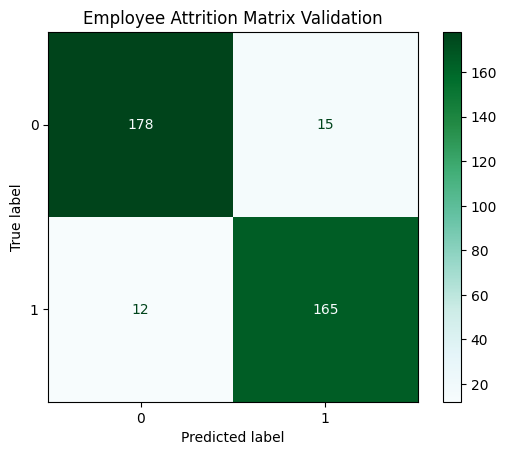

FPR for Validation E_Attrition: 0.07772020725388601
FNR for Validation E_Attrition: 0.06779661016949153


In [185]:
from sklearn.ensemble import HistGradientBoostingClassifier as E_AttHisGrb

Att_Eprm = {'learning_rate': [0.1, 0.3, 0.8],'max_iter':[100,200,350],'max_depth':[2,5,8,9]}
Att_EMod = E_AttHisGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttHisGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       156
           1       0.92      0.88      0.90       214

    accuracy                           0.89       370
   macro avg       0.88      0.89      0.88       370
weighted avg       0.89      0.89      0.89       370



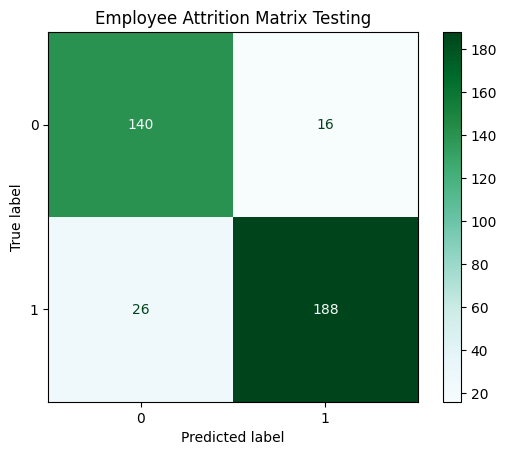

FPR for Testing E_Attrition: 0.10256410256410256
FNR for Testing E_Attrition: 0.12149532710280374


In [186]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

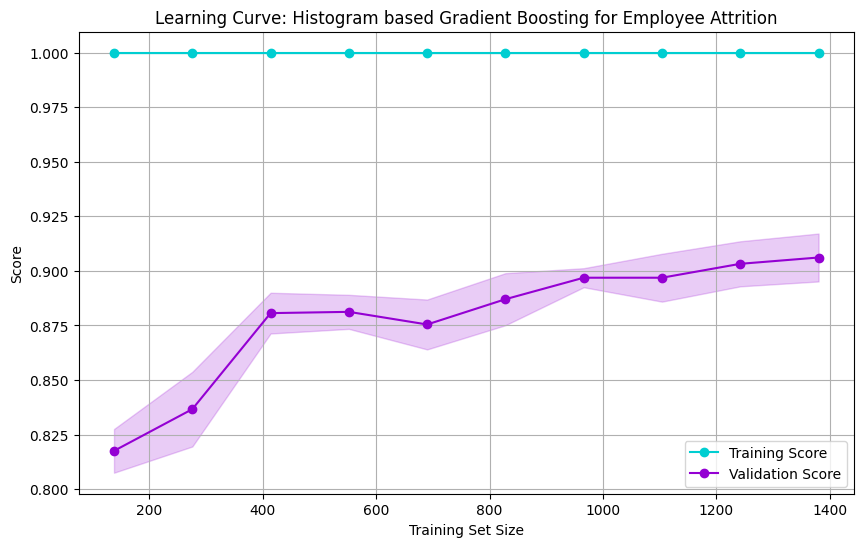

In [187]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="HistGB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttHisGrb(learning_rate= 0.8, max_depth= 8, max_iter= 350) ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Histogram based Gradient Boosting for Employee Attrition",
    cv=5
)

**Extreme Gradient Boosting Using Union Features**

{'learning_rate': 0.8, 'max_depth': 5, 'n_estimators': 150}
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       193
           1       0.90      0.92      0.91       177

    accuracy                           0.91       370
   macro avg       0.91      0.91      0.91       370
weighted avg       0.91      0.91      0.91       370



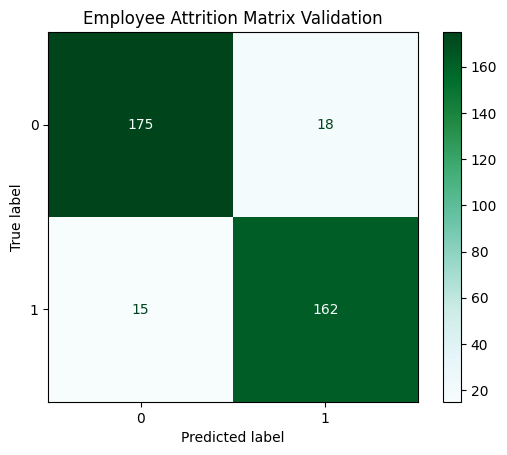

FPR for Validation E_Attrition: 0.09326424870466321
FNR for Validation E_Attrition: 0.0847457627118644


In [188]:
from xgboost import XGBClassifier as E_AttExGrb

Att_Eprm = { 'max_depth':[2,5,7,9],'learning_rate': [0.1, 0.3, 0.8],'n_estimators':[100, 140, 150, 200]}
Att_EMod = E_AttExGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttExGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       156
           1       0.94      0.89      0.91       214

    accuracy                           0.90       370
   macro avg       0.90      0.90      0.90       370
weighted avg       0.90      0.90      0.90       370



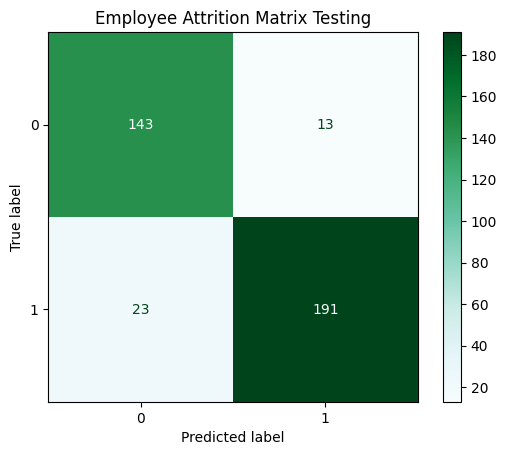

FPR for Testing E_Attrition: 0.08333333333333333
FNR for Testing E_Attrition: 0.10747663551401869


In [189]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

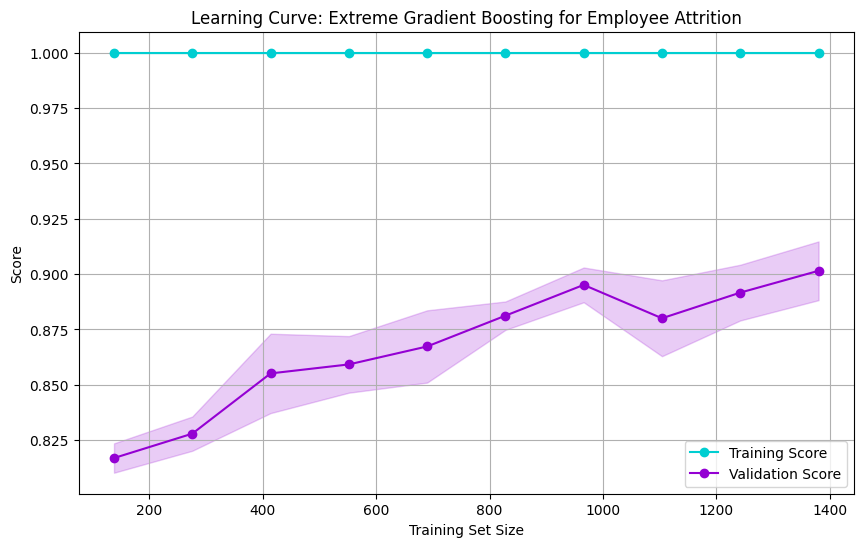

In [190]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="XGB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttExGrb(learning_rate= 0.8, max_depth= 7, n_estimators= 100) ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Extreme Gradient Boosting for Employee Attrition",
    cv=5
)

**Decision Tree Using Union Features**

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       193
           1       0.76      0.82      0.79       177

    accuracy                           0.79       370
   macro avg       0.79      0.79      0.79       370
weighted avg       0.79      0.79      0.79       370



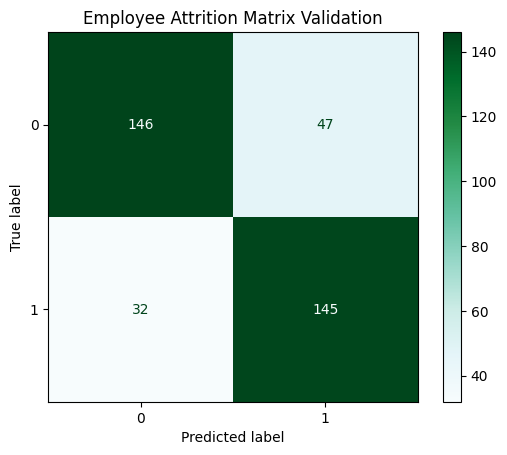

FPR for Validation E_Attrition: 0.24352331606217617
FNR for Validation E_Attrition: 0.1807909604519774


In [191]:
from sklearn.tree import DecisionTreeClassifier as E_AttDEC

Att_Eprm = {'criterion':['gini', 'entropy', 'log_loss'],'max_depth': [10, 5, 8, 3],'min_samples_split':[2, 4, 5, 7]}
Att_EMod = E_AttDEC(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttDEC(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       156
           1       0.86      0.83      0.84       214

    accuracy                           0.82       370
   macro avg       0.82      0.82      0.82       370
weighted avg       0.82      0.82      0.82       370



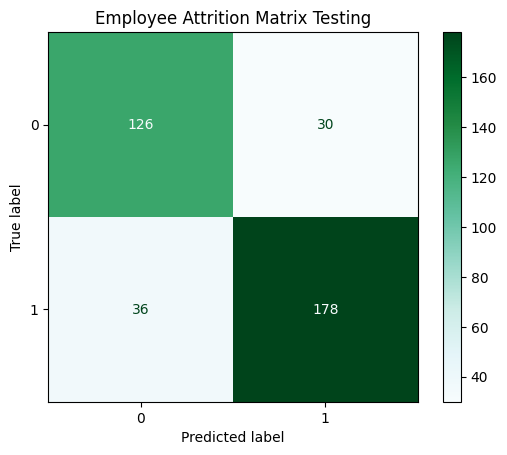

FPR for Testing E_Attrition: 0.19230769230769232
FNR for Testing E_Attrition: 0.16822429906542055


In [192]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

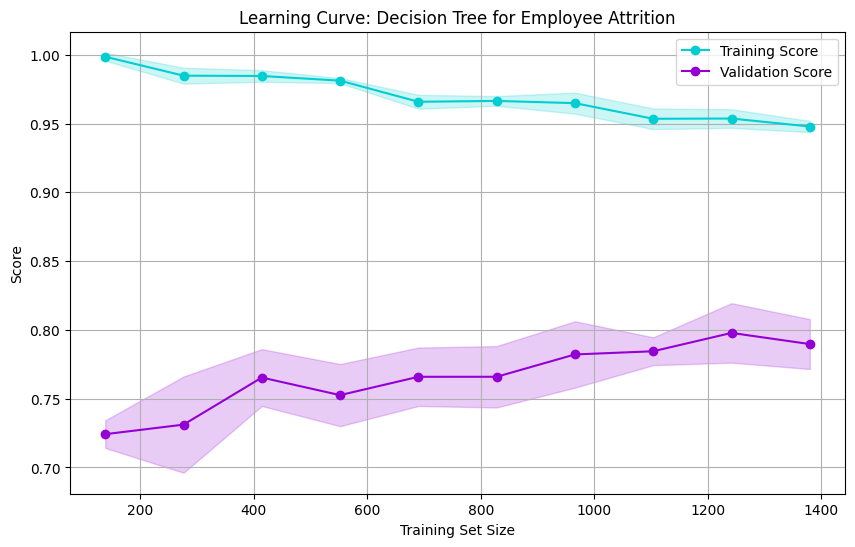

In [193]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="DT Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttDEC(criterion= 'gini', max_depth= 8, min_samples_split= 2) ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Decision Tree for Employee Attrition",
    cv=5
)

**Multi-Layer Perceptron (MLP) Using Union Features**

{'activation': 'logistic', 'hidden_layer_sizes': 30, 'solver': 'adam'}
              precision    recall  f1-score   support

           0       0.58      0.47      0.52       193
           1       0.52      0.63      0.57       177

    accuracy                           0.55       370
   macro avg       0.55      0.55      0.55       370
weighted avg       0.55      0.55      0.55       370



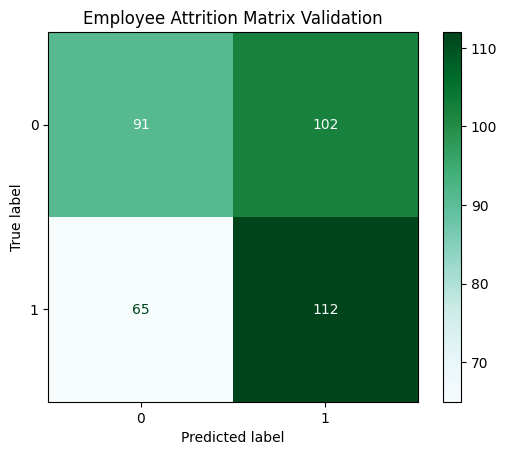

FPR for Validation E_Attrition: 0.5284974093264249
FNR for Validation E_Attrition: 0.3672316384180791


In [194]:
from sklearn.neural_network import MLPClassifier as E_AttMult

Att_Eprm = {'hidden_layer_sizes':[10, 20, 30],'activation': ['relu','tanh','logistic'],'solver':['lbfgs','adam','sgd']}
Att_EMod = E_AttMult(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttMult(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ### Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ### Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.43      0.36      0.39       156
           1       0.59      0.66      0.62       214

    accuracy                           0.53       370
   macro avg       0.51      0.51      0.51       370
weighted avg       0.52      0.53      0.52       370



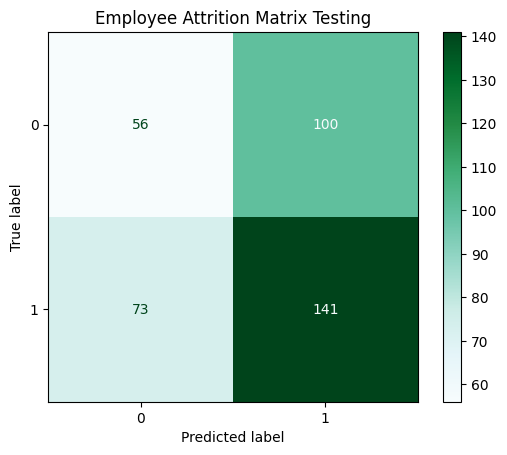

FPR for Testing E_Attrition: 0.6410256410256411
FNR for Testing E_Attrition: 0.3411214953271028


In [195]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) #### Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

#### Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

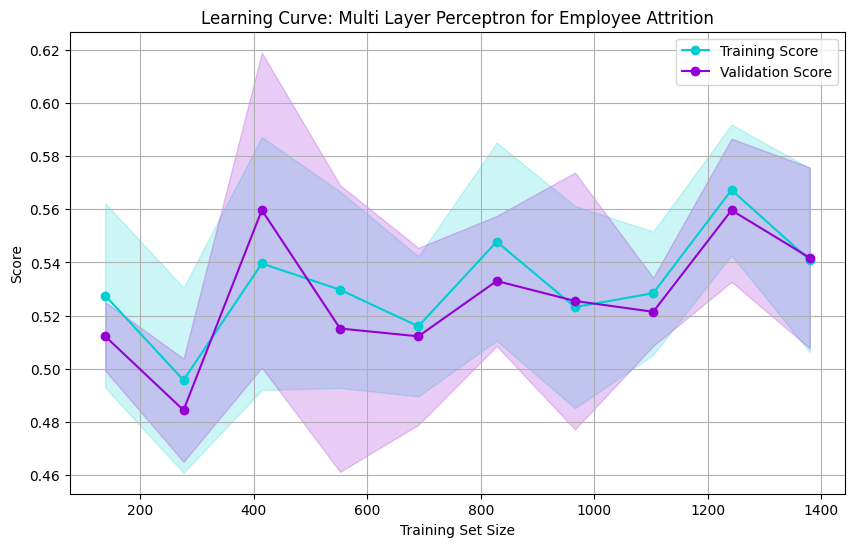

In [196]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="MLP Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    #### Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ### Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttMult(activation= 'relu', hidden_layer_sizes= 20, solver= 'lbfgs') ### Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Multi Layer Perceptron for Employee Attrition",
    cv=5
)